# Подготовка к анализу

## Импорт библиотек

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import spearmanr
%matplotlib inline

ALPHA = 0.05

## Загрузка данных

Загрузим данные из файла "heart.csv" с датасетом, также выведем информацию о данных и посмотрим первые 5 наблюдений из датасета

In [23]:
data = pd.read_csv('heart.csv')
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   target    303 non-null    int64
dtypes: int64(10)
memory usage: 23.8 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  target
 0   63    1   3       145   233    1        0      150      0       1
 1   37    1   2       130   250    0        1      187      0       1
 2   41    0   1       130   204    0        0      172      0       1
 3   56    1   1       120   236    0        1      178      0       1
 4   57    0   0       120   354    0        1      163      1       1)

## Описание данных


* **age** — возраст пациента
* **sex** — пол пациента (1 = мужчина, 0 = женщина)
* **cp** — тип боли в груди (1 = типичная стенокардия, 2 = атипичная стенокардия, 3 = другой вид боли, 4 = нет боли)
* **trestbps** — артериальное давление в состоянии покоя (мм ртутного столба, на момент госпитализации)
* **chol** — уровень холестерола (мг/дл)
* **fbs** — уровень сахара крови натощак выше 120 мг/дл (1 = да, 0 = нет)
* **restecg** — результат ЭКГ в состоянии покоя (0 = нормальный, 1 = абнормальный, 2 = признаки гипертрофии желудочка)
* **thalach** — максимальная зафиксированная частота сердцебиения
* **exang** — стенокардия в результате физической нагружки (1 = да, 0 = нет)
* **target** — наличие сердечно-сосудистого заболевания (1 = да, 0 = нет)

# Корреляционный анализ

## Описываем параметры

Зависимые переменные - это переменные, которые мы пытаемся предсказать или объяснить. Независимые переменные - это те, которые используются для объяснения зависимых переменных.

In [24]:
data_description = data.describe()

data_description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,1.000000


* age (Возраст пациента): Средний возраст — 54.4 года, минимальный — 29 лет, максимальный — 77 лет.
* sex (Пол пациента): 68.3% — мужчины (значение 1), 31.7% — женщины (значение 0).
* cp (Тип боли в груди): Среднее значение — 0.97 (наиболее частый тип боли — "отсутствие боли" или "другой вид боли", так как это значение больше 0.5).
* trestbps (Артериальное давление в состоянии покоя): Среднее значение — 131.6 мм рт. ст., минимальное — 94, максимальное — 200.
* chol (Уровень холестерина): Средний уровень — 246.3 мг/дл, минимальный — 126, максимальный — 564.
* fbs (Уровень сахара натощак > 120 мг/дл): Только у 14.9% пациентов уровень сахара превышал 120 мг/дл (значение 1).
* restecg (Результат ЭКГ): Среднее значение — 0.53, что означает, что чаще всего ЭКГ была нормальной (0), хотя присутствуют и отклонения (значения 1 и 2).
* thalach (Максимальная частота сердечных сокращений): Средняя частота — 149.6 ударов в минуту, минимальная — 71, максимальная — 202.
* exang (Стенокардия при нагрузке): У 32.7% пациентов возникала стенокардия при физической нагрузке (значение 1).
* target (Наличие сердечно-сосудистого заболевания): У 54.5% пациентов диагностированы сердечно-сосудистые заболевания (значение 1).

## Проведем анализ данных, чтобы понять близость распределения к нормальным

### Графический метод

#### Гистограммы  
Гистограмма представляет собой график, который отображает распределение данных по интервалам (бинам). На оси X откладываются значения переменной, а на оси Y — частота (количество наблюдений) для каждого интервала.
1. Форма распределения:
    * Если гистограмма напоминает колокол, это может указывать на нормальное распределение.
    * Если распределение скошено (например, влево или вправо), это может указывать на ненормальность.

2. Наличие выбросов:
    * Выбросы будут выглядеть как отдельные столбцы, которые значительно выше или ниже остальных.

3. Ширина и высота:
    * Ширина гистограммы может показать, насколько разнообразны ваши данные. Высокие столбцы указывают на более частые значения. 

#### Q-Q График 
Q-Q график — это способ визуального сравнения распределения вашей выборки с нормальным распределением. На этом графике откладываются квантильные значения вашей выборки на оси Y и те же квантильные значения для нормального распределения на оси X.
1. Нормальность данных:
    * Если точки на графике располагаются близко к прямой линии (линии 45 градусов), это указывает на то, что ваши данные нормально распределены.
    * Если точки отклоняются от этой линии, особенно в хвостах (то есть в крайних значениях), это может указывать на ненормальность (например, наличие длинных хвостов или скошенность).

2. Форма распределения:
    * Углы отклонения от линии могут указывать на тип ненормальности (например, положительное или отрицательное скошение).

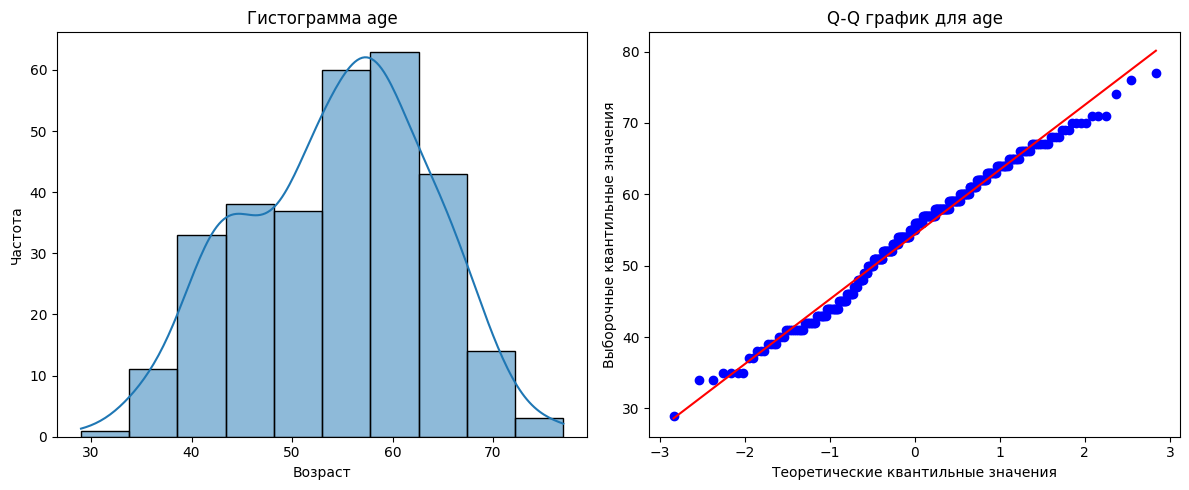

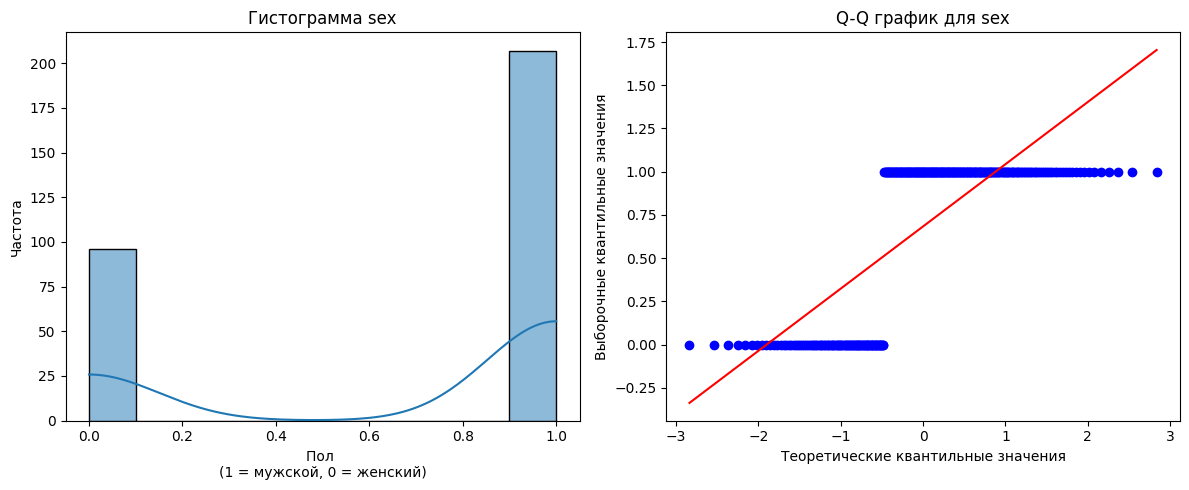

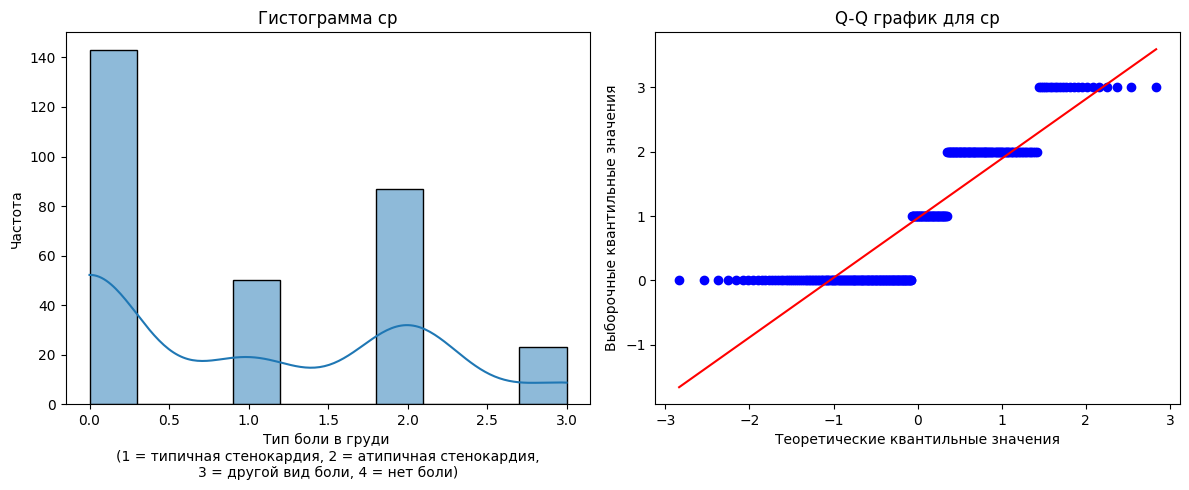

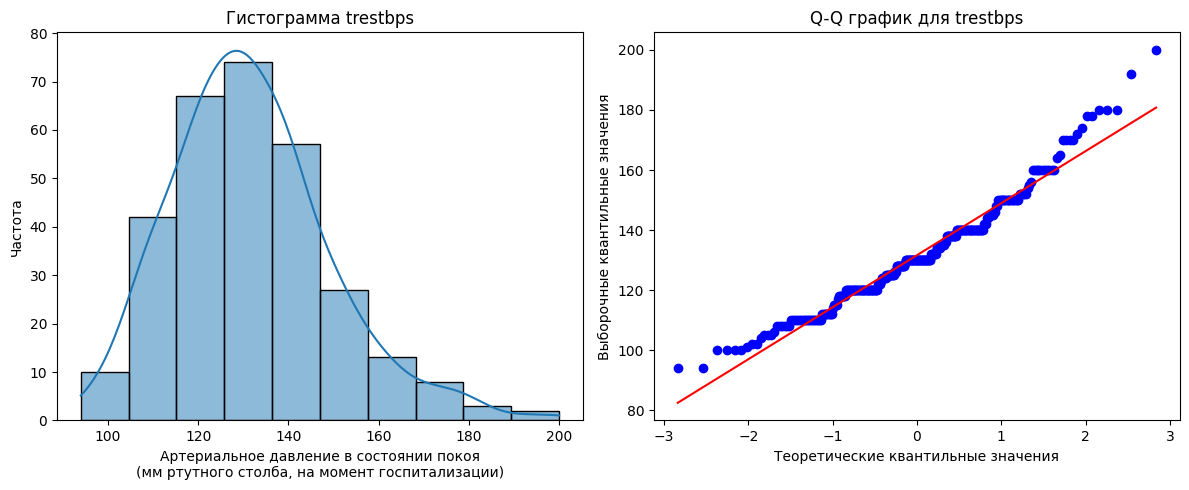

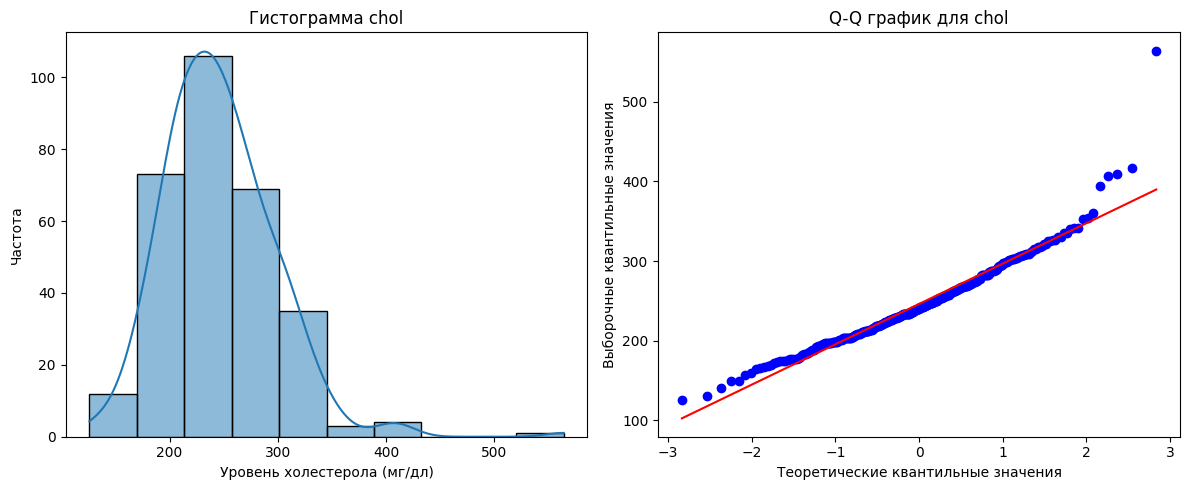

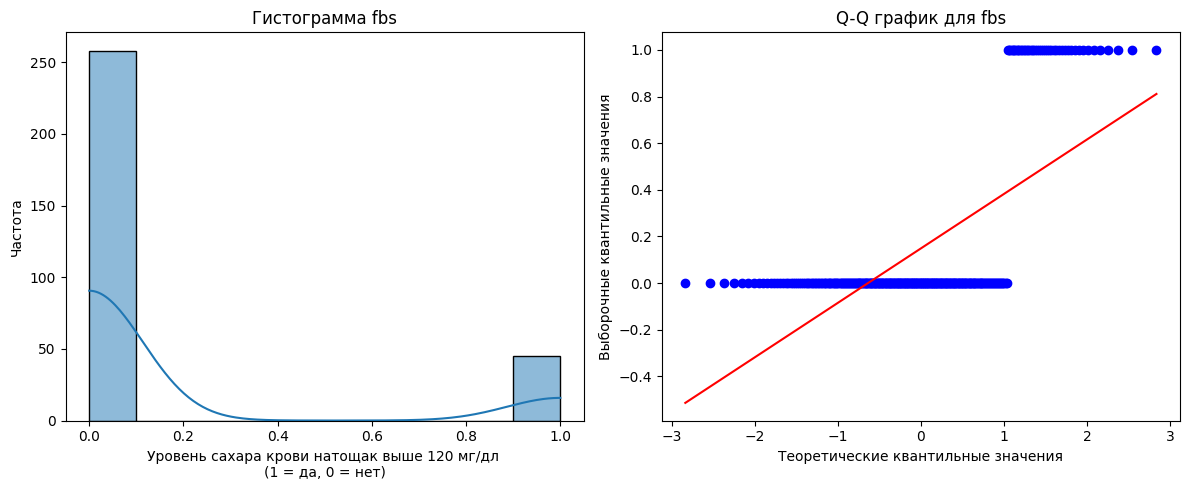

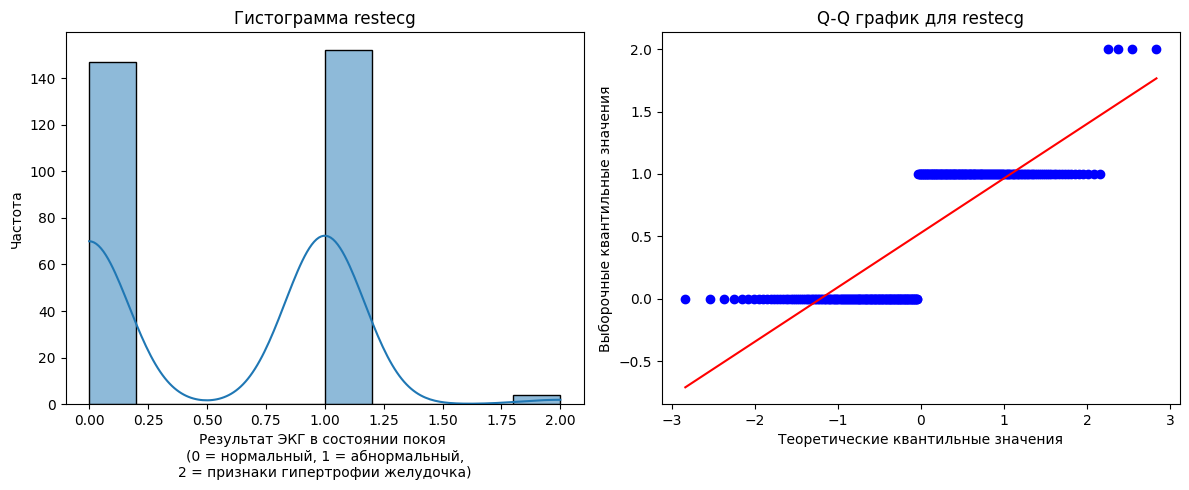

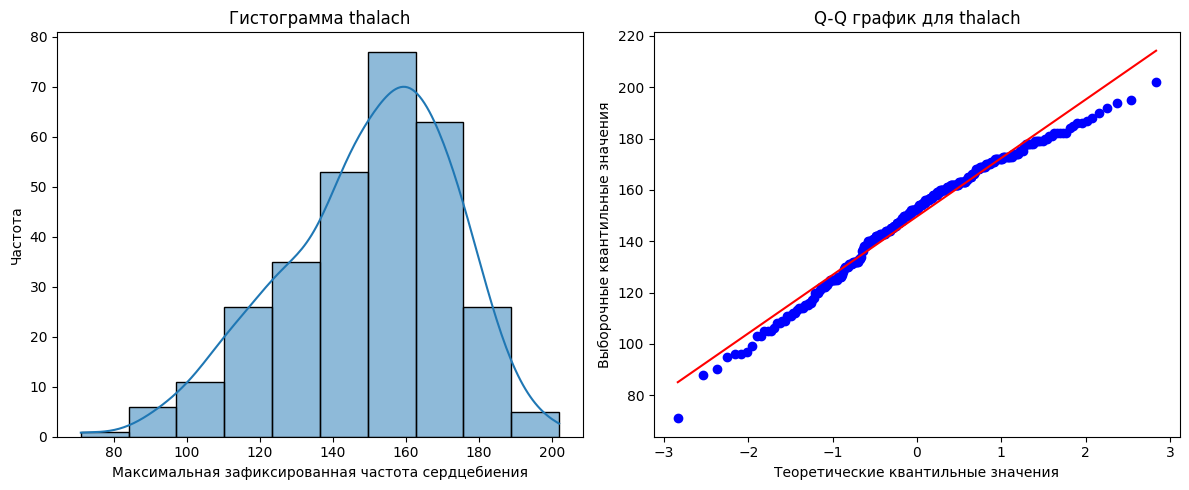

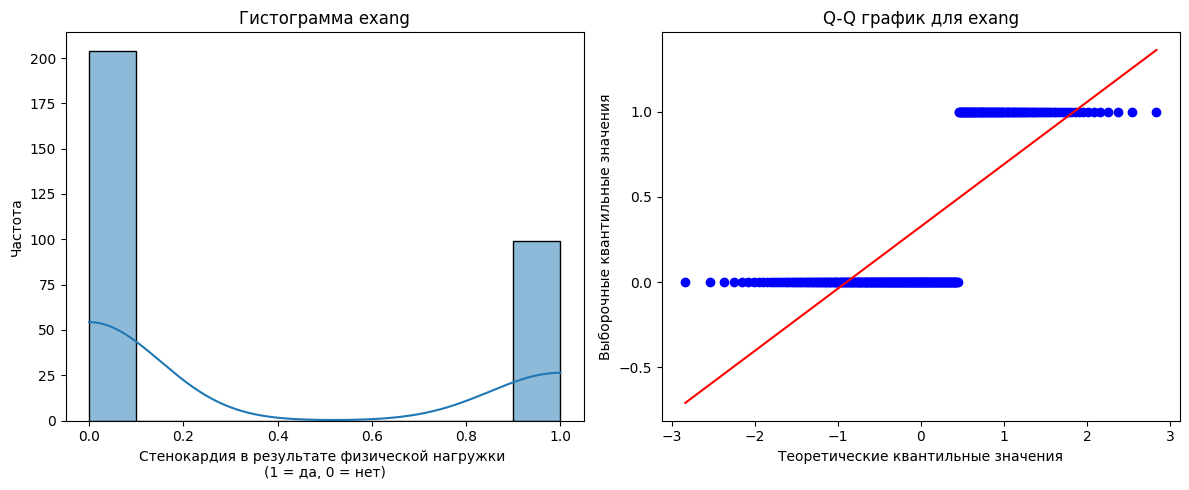

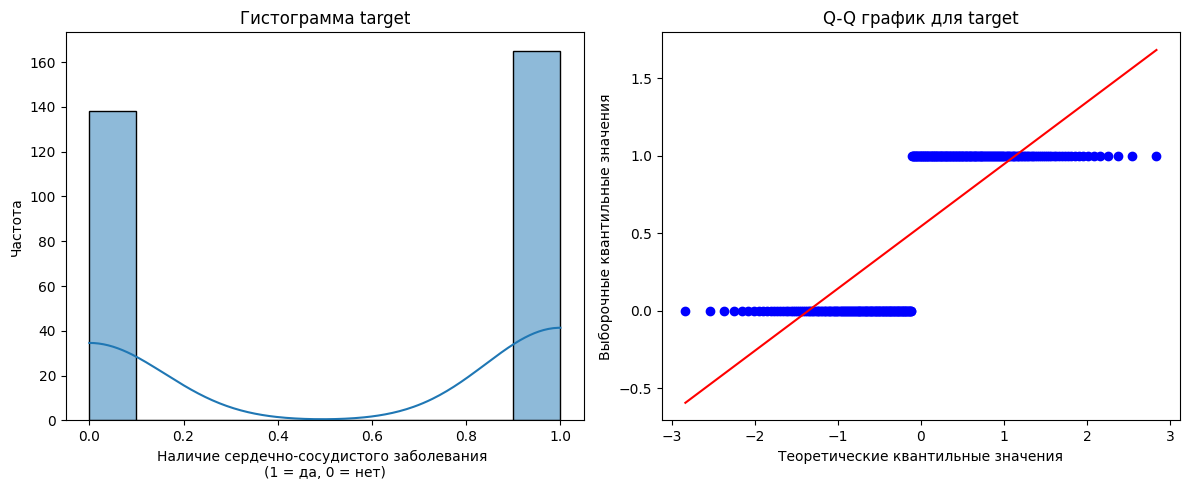

In [25]:
descriptions = {
    'age': 'Возраст',
    'sex': 'Пол \n(1 = мужской, 0 = женский)',
    'cp': 'Тип боли в груди \n(1 = типичная стенокардия, 2 = атипичная стенокардия,\n3 = другой вид боли, 4 = нет боли)',
    'trestbps': 'Артериальное давление в состоянии покоя\n(мм ртутного столба, на момент госпитализации)',
    'chol': 'Уровень холестерола (мг/дл)',
    'fbs': 'Уровень сахара крови натощак выше 120 мг/дл \n(1 = да, 0 = нет)',
    'restecg': 'Результат ЭКГ в состоянии покоя \n(0 = нормальный, 1 = абнормальный,\n2 = признаки гипертрофии желудочка)',
    'thalach': 'Максимальная зафиксированная частота сердцебиения',
    'exang': 'Стенокардия в результате физической нагружки \n(1 = да, 0 = нет)',
    'target': 'Наличие сердечно-сосудистого заболевания \n(1 = да, 0 = нет)'
}

for _,column in enumerate(data.columns):
    plt.figure(figsize=(12, 5))
    
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins='sturges')
    plt.title(f'Гистограмма {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('Частота') 
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q график для {column}')
    plt.xlabel('Теоретические квантильные значения')  
    plt.ylabel('Выборочные квантильные значения')  
    
    plt.tight_layout()
    plt.show()

### Статистический метод

#### Тест Шапиро-Уилка

**Описание:**
Тест Шапиро-Уилка (Shapiro-Wilk test) предназначен для проверки гипотезы о нормальности распределения данных. Он разработан для небольших выборок, но может быть применен и для более крупных наборов данных.

**Гипотезы:**
* Нулевая гипотеза (H0): Данные имеют нормальное распределение.
* Альтернативная гипотеза (H1): Данные не имеют нормального распределения.

**Результаты:**
Тест возвращает статистику теста и p-value.
* Статистика теста: Чем ближе к 1, тем более вероятно, что данные нормально распределены.
* p-value: Если p-value меньше заранее установленного уровня значимости (обычно 0.05), мы отвергаем нулевую гипотезу и делаем вывод, что данные не имеют нормального распределения.

#### Тест Колмогорова-Смирнова
**Описание:**
Тест Колмогорова-Смирнова (Kolmogorov-Smirnov test) используется для сравнения распределения выборки с заданным теоретическим распределением, в данном случае — нормальным.

**Гипотезы:**
* Нулевая гипотеза (H0): Данные имеют указанное распределение (например, нормальное).
* Альтернативная гипотеза (H1): Данные не имеют указанного распределения.

**Результаты:**
Тест возвращает статистику теста и p-value.
* Статистика теста: Это максимальное отклонение между эмпирической функцией распределения данных и теоретической функцией распределения.
* p-value: Аналогично тесту Шапиро-Уилка, если p-value меньше 0.05, мы отвергаем нулевую гипотезу и можем заключить, что данные не соответствуют нормальному распределению.

In [26]:
statistic_results = []

for column in data.columns:
    shapiro_test = stats.shapiro(data[column])
    
    kstest = stats.kstest(data[column], 'norm', args=(np.mean(data[column]), np.std(data[column])))
    
    statistic_results.append({
        'Аттрибут': column,
        'Шапиро-Уилка статистика': shapiro_test.statistic,
        'Шапиро-Уилка p-value': shapiro_test.pvalue,
        'Колмогорова-Смирнова статистика': kstest.statistic,
        'Колмогорова-Смирнова p-value': kstest.pvalue,
        'Шапиро-Уилка нормальность': shapiro_test.pvalue >= ALPHA,  
        'Колмогорова-Смирнова нормальность': kstest.pvalue >= ALPHA,
        'p_value_bounf': ALPHA,
    })

stat_res = pd.DataFrame(statistic_results)
stat_res

,Аттрибут,Шапиро-Уилка статистика,Шапиро-Уилка p-value,Колмогорова-Смирнова статистика,Колмогорова-Смирнова p-value,Шапиро-Уилка нормальность,Колмогорова-Смирнова нормальность,p_value_bounf
0,age,0.986370,5.798359e-03,0.076315,5.562192e-02,False,True,0.05
1,sex,0.585730,2.750712e-26,0.435234,1.023878e-52,False,False,0.05
2,cp,0.790159,1.857152e-19,0.297957,2.405773e-24,False,False,0.05
3,trestbps,0.965918,1.458097e-06,0.101664,3.524286e-03,False,False,0.05
4,chol,0.946882,5.364847e-09,0.055380,2.995070e-01,False,True,0.05
5,fbs,0.423987,5.430898e-30,0.513378,1.170274e-74,False,False,0.05
6,restecg,0.679316,1.378110e-23,0.330515,5.400830e-30,False,False,0.05
7,thalach,0.976315,6.620820e-05,0.071473,8.615719e-02,False,True,0.05
8,exang,0.591264,3.846846e-26,0.430250,1.810690e-51,False,False,0.05
9,target,0.633594,5.667296e-25,0.364335,1.489362e-36,False,False,0.05


### Графический метод совместно с теоретическим

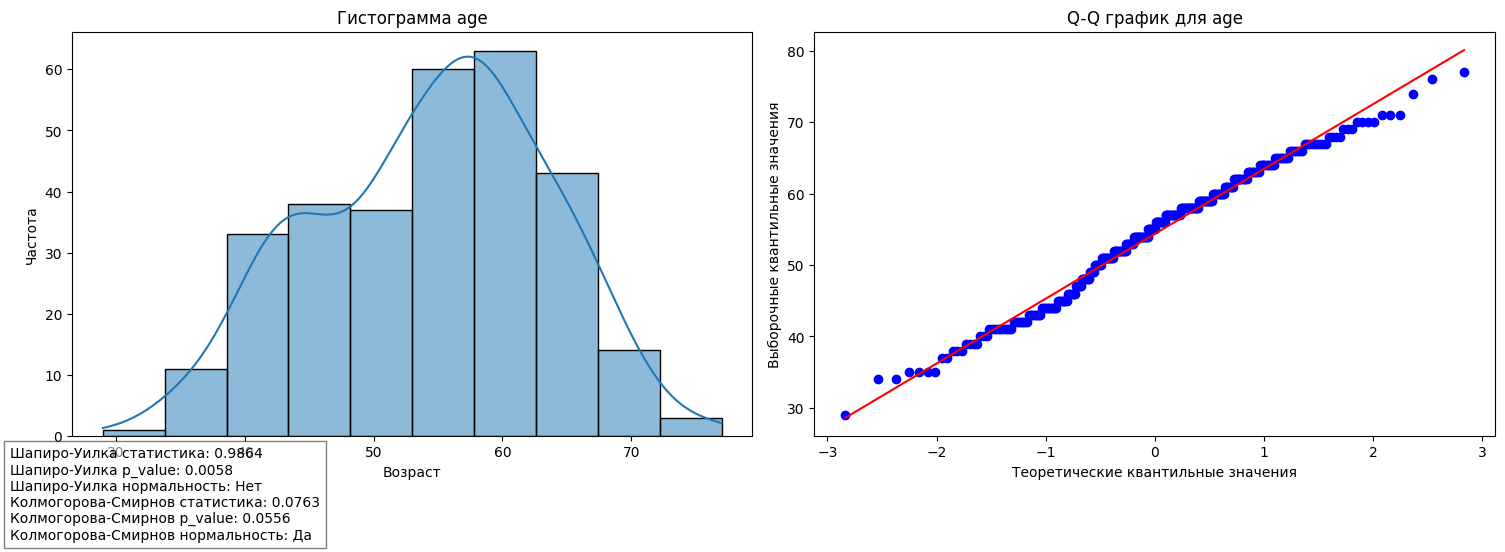

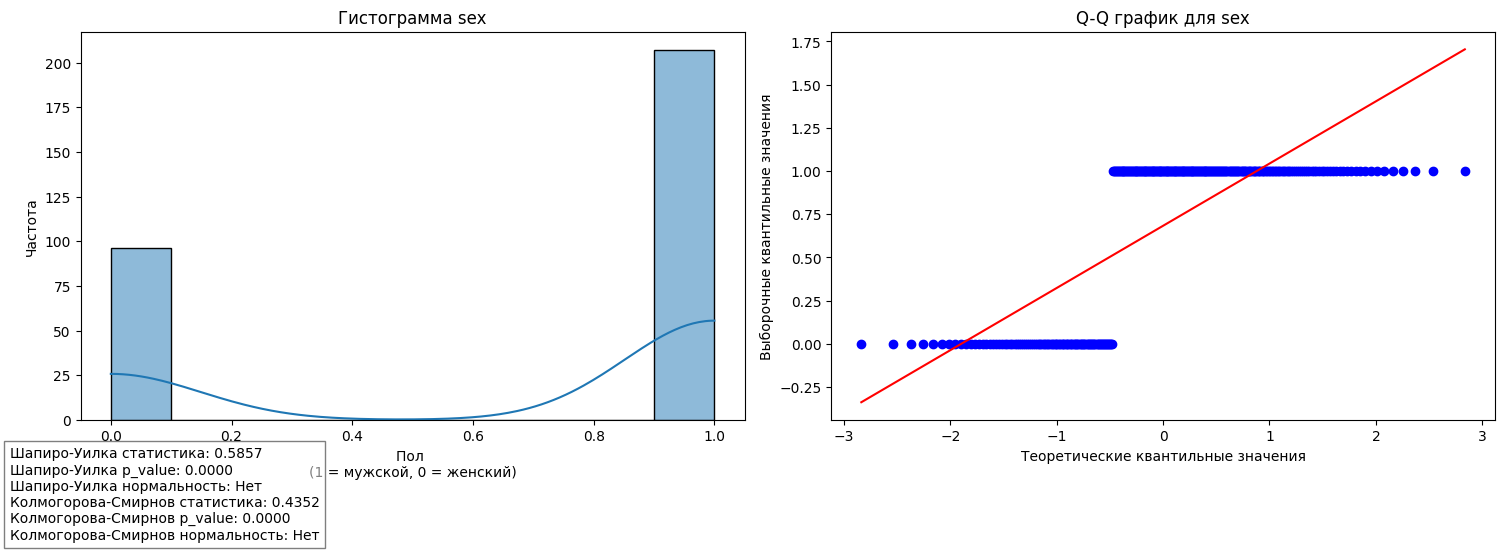

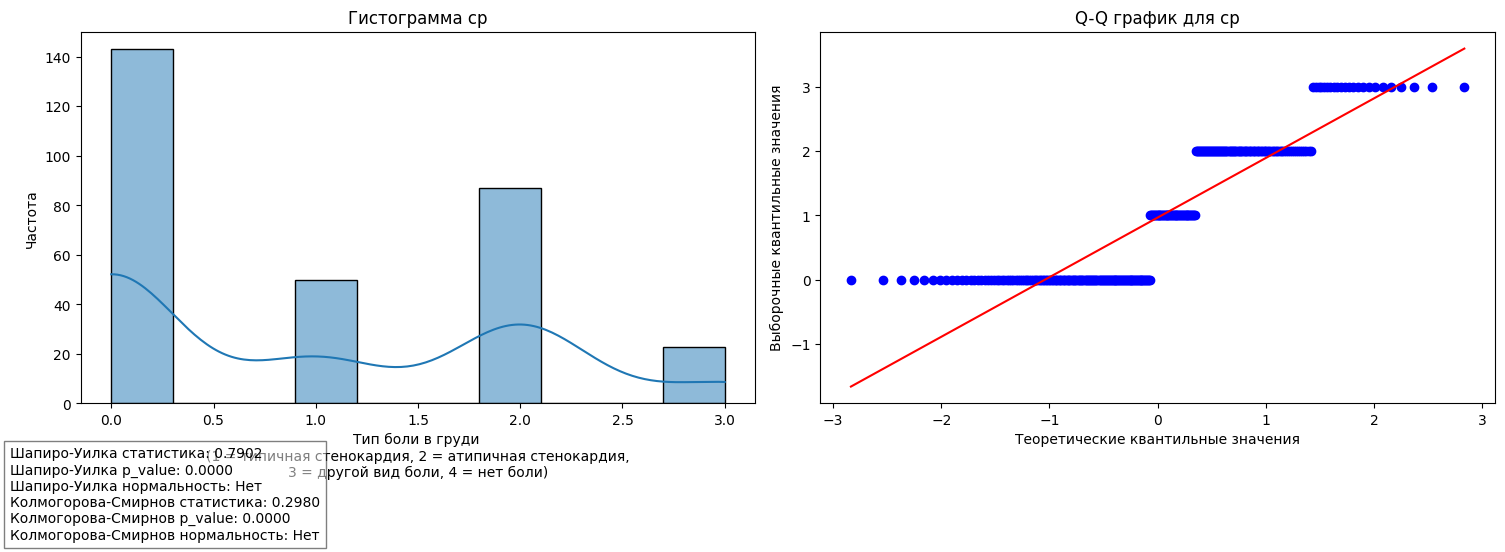

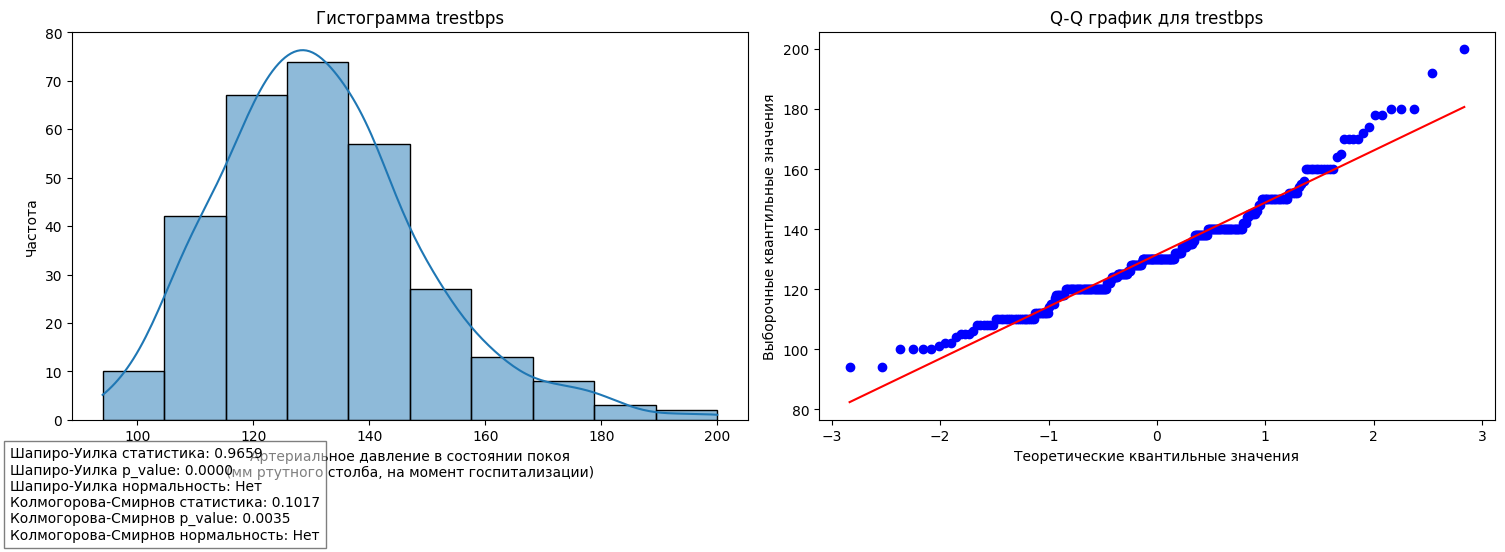

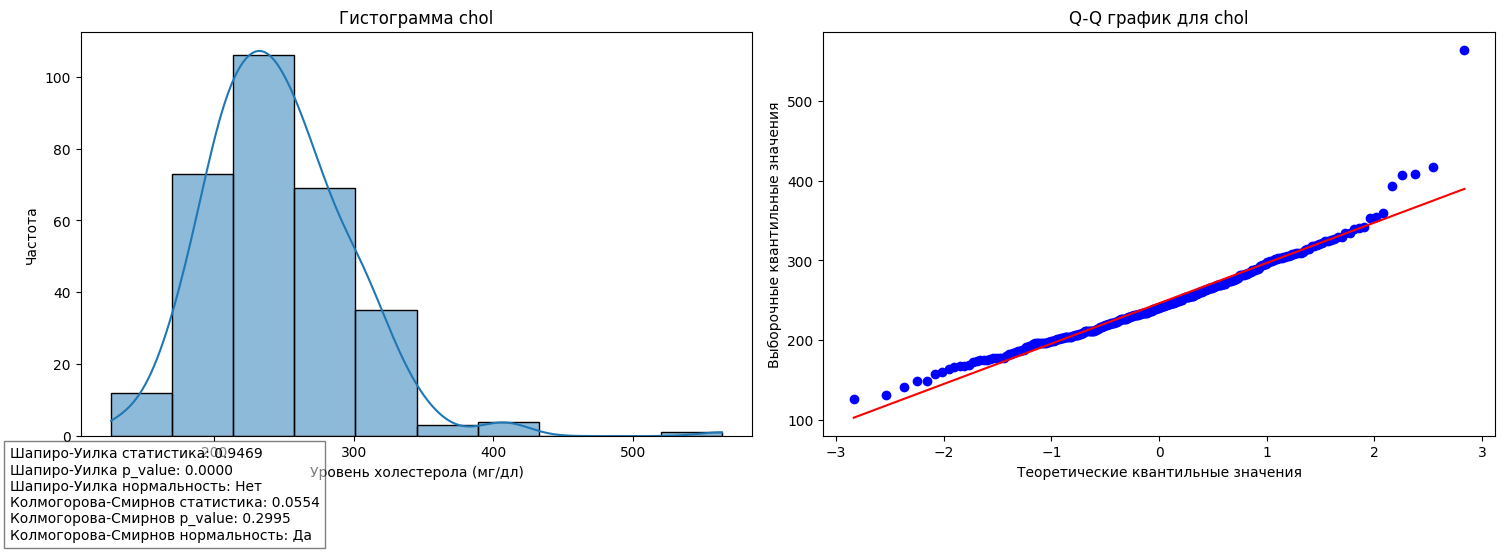

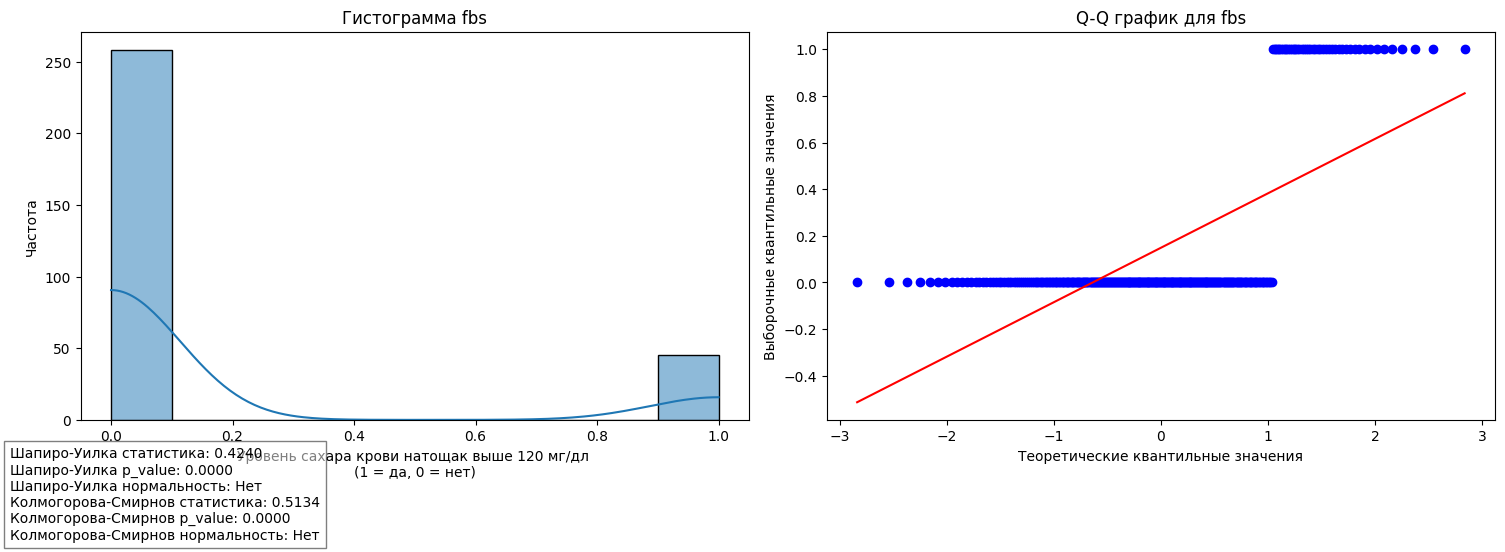

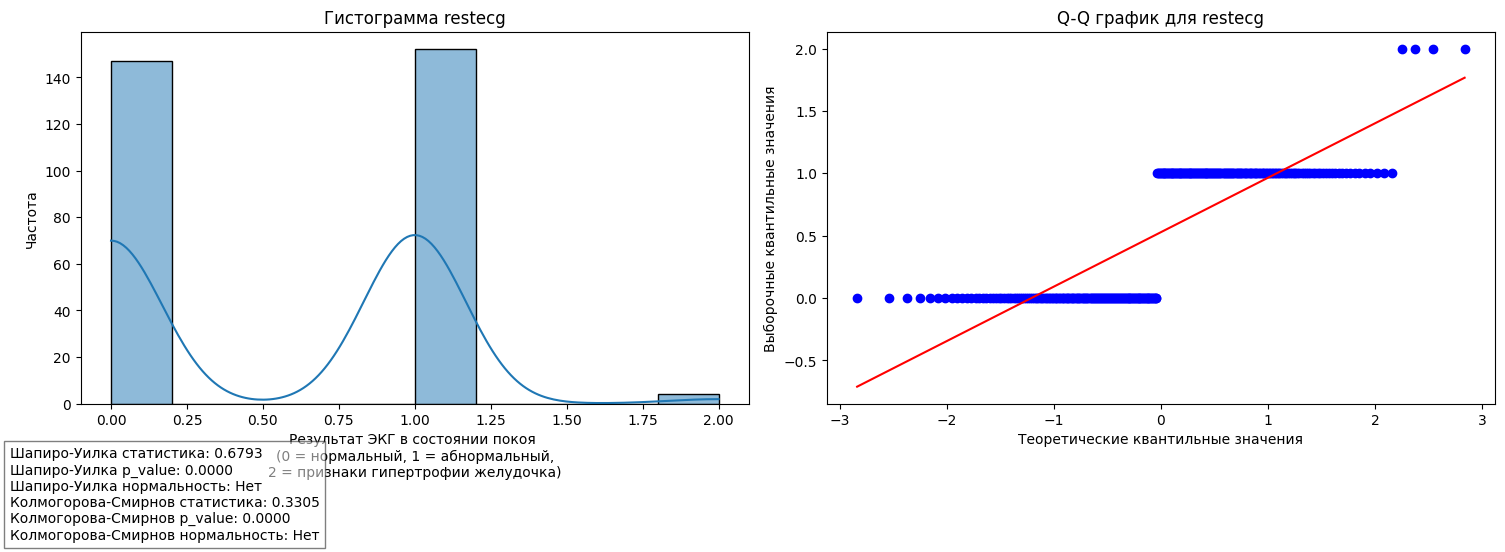

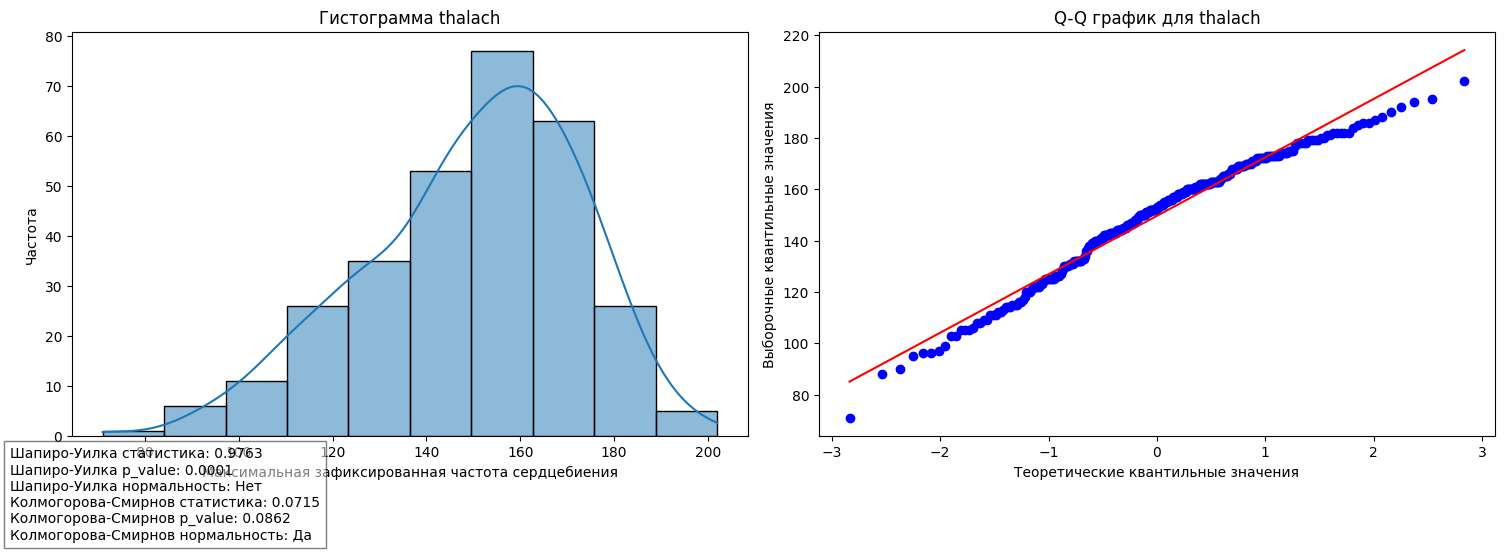

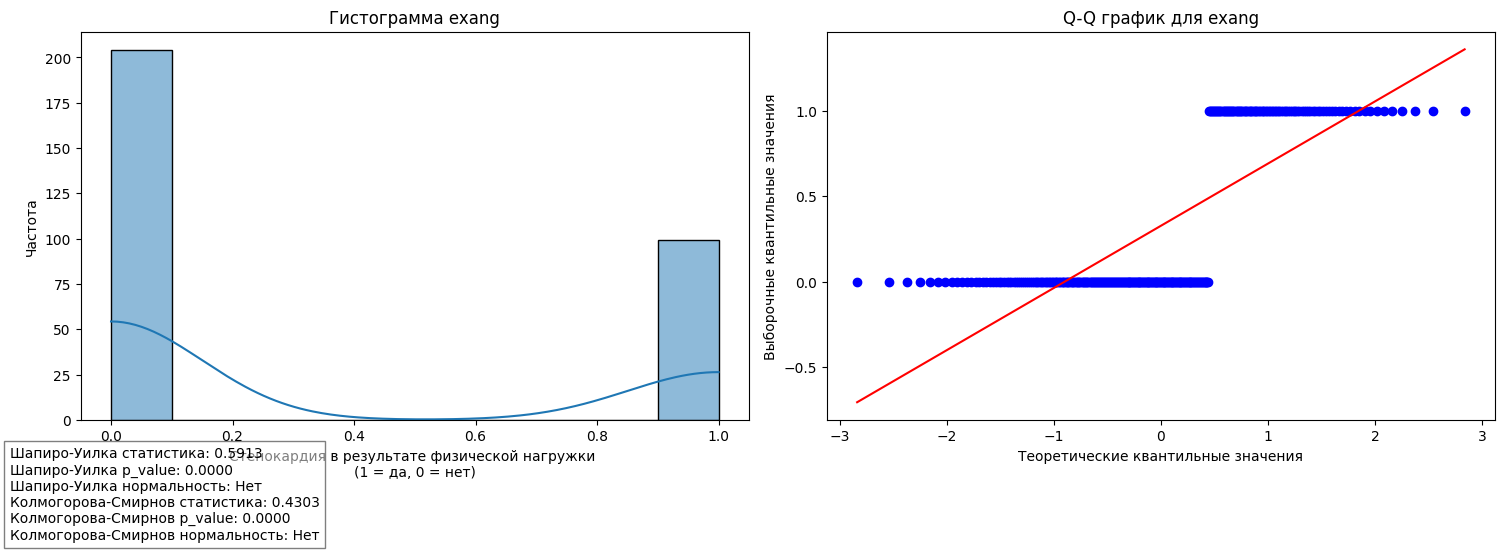

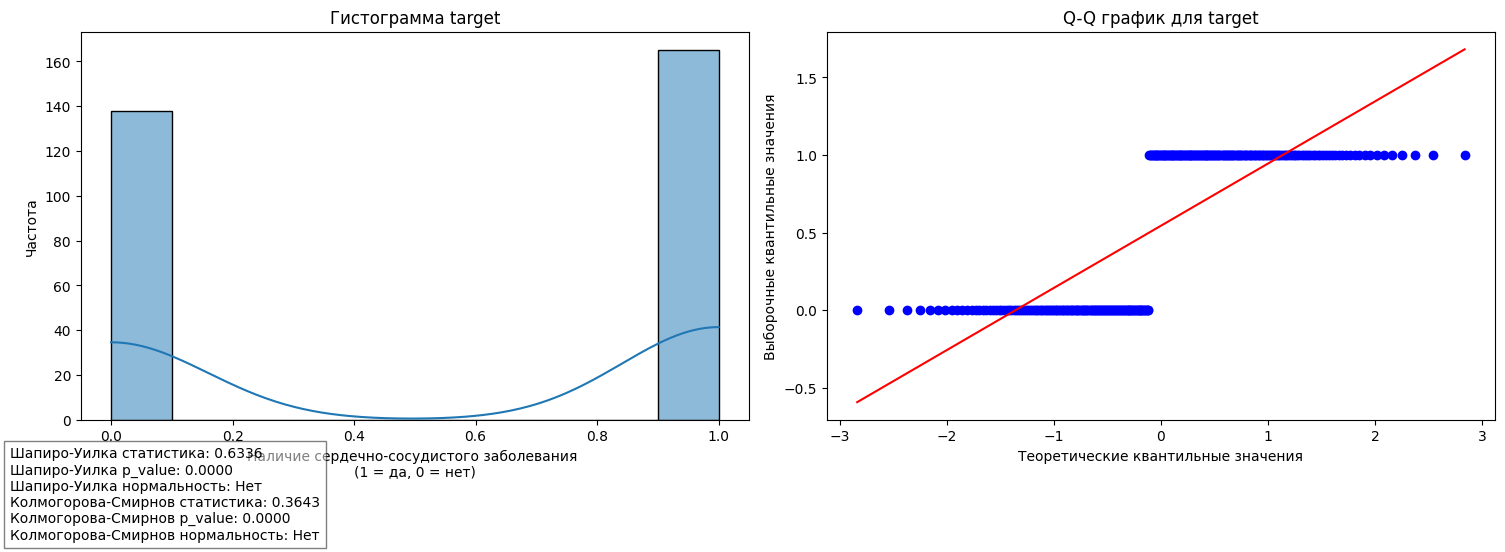

In [27]:
def create_statistic_descr(column):
    shapiro_value = stat_res.loc[stat_res['Аттрибут'] == column, 'Шапиро-Уилка статистика'].values[0]
    shapiro_p_value = stat_res.loc[stat_res['Аттрибут'] == column, 'Шапиро-Уилка p-value'].values[0]
    shapiro_norm = stat_res.loc[stat_res['Аттрибут'] == column, 'Шапиро-Уилка нормальность'].values[0]
    
    sk_value = stat_res.loc[stat_res['Аттрибут'] == column, 'Колмогорова-Смирнова статистика'].values[0]
    sk_p_value = stat_res.loc[stat_res['Аттрибут'] == column, 'Колмогорова-Смирнова p-value'].values[0]
    sk_norm = stat_res.loc[stat_res['Аттрибут'] == column, 'Колмогорова-Смирнова нормальность'].values[0]

    return f"\n".join((
        f'Шапиро-Уилка статистика: {shapiro_value:.4f}',
        f'Шапиро-Уилка p_value: {shapiro_p_value:.4f}',
        f'Шапиро-Уилка нормальность: {'Да' if shapiro_norm else 'Нет'}',
        f'Колмогорова-Смирнов статистика: {sk_value:.4f}',
        f'Колмогорова-Смирнов p_value: {sk_p_value:.4f}',
        f'Колмогорова-Смирнов нормальность: {'Да' if sk_norm else 'Нет'}',
    ))


for _,column in enumerate(data.columns):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins='sturges')
    plt.title(f'Гистограмма {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q график для {column}')
    plt.xlabel('Теоретические квантильные значения')  
    plt.ylabel('Выборочные квантильные значения')  
    
    textstr = create_statistic_descr(column)
    plt.gcf().text(0, 0.0, textstr, ha='left', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
   
    plt.tight_layout()
    plt.show()


Выведем графики гистограмм, Q-Q график и значения статистических тестов Шапиро-Уилка и Колмогорова-Смирнова

### Выводы о близости выборки к нормальной

### Общие выводы

Тесты на нормальность:  
Шапиро-Уилка и Колмогорова-Смирнова — оба теста используются для проверки гипотезы о том, что данные следуют нормальному распределению. Если p-value меньше уровня значимости (обычно 0.05), то гипотезу о нормальности отвергают.  
В вашем случае, для большинства атрибутов (за исключением chol, thalach и age для Шапиро-Уилка) мы можем утверждать, что данные не нормально распределены (p-value < 0.05).  

### Подробные выводы по атрибутам  

1. Возраст (age):  
Шапиро-Уилка: Статистика = 0.986370, p-value = 0.005798 → нормальность **отвергнута**.  
Колмогорова-Смирнова: Статистика = 0.076315, p-value = 0.055621 → здесь нормальность **не отвергается**.  
Вывод: Хотя тест Шапиро-Уилка отвергает нормальность, тест Колмогорова-Смирнова указывает на возможное приближение к нормальному распределению.  

2. Пол (sex):  
Оба теста показывают, что данные не нормально распределены (p-value < 0.05).  
Вывод: Атрибут sex не следует нормальному распределению.  

3. Тип боли в груди (cp):  
Оба теста указывают на отклонение от нормальности.  
Вывод: Данные по этому атрибуту не нормально распределены.  

4. Артериальное давление (trestbps):  
Тесты показывают, что данные не нормально распределены.  
Вывод: trestbps не следует нормальному распределению.  

5. Уровень холестерола (chol):  
Шапиро-Уилка: отвергает нормальность, но Колмогорова-Смирнова не отвергает.  
Вывод: Неопределенное распределение, возможно, есть смещение.  

6. Уровень сахара в крови (fbs):  
Оба теста отвергают нормальность.  
Вывод: fbs не нормально распределен.  

7. Результат ЭКГ в состоянии покоя (restecg):  
Оба теста показывают, что данные не нормально распределены.  
Вывод: restecg не следует нормальному распределению.  

8. Максимальная зафиксированная частота сердцебиения (thalach):  
Шапиро-Уилка отвергает нормальность, но Колмогорова-Смирнова не отвергает.  
Вывод: Возможно, есть какое-то смещение, но в целом данные не сильно отклоняются от нормального.  

9. Стенокардия в результате физической нагрузки (exang):  
Оба теста отвергают нормальность.  
Вывод: exang не нормально распределен.  

10. Наличие сердечно-сосудистого заболевания (target):  
Оба теста отвергают нормальность.  
Вывод: target также не следует нормальному распределению.

## Исследование зависимостей с помощью таблиц сопряженности

### Построение таблиц сопряженности

In [28]:
variable_pairs = [
    ('sex', 'cp'),            # Пол и тип боли в груди
    ('sex', 'target'),        # Пол и наличие сердечно-сосудистых заболеваний
    ('cp', 'target'),         # Тип боли в груди и наличие сердечно-сосудистых заболеваний
    ('fbs', 'target'),        # Уровень сахара в крови натощак и наличие сердечно-сосудистых заболеваний
    ('restecg', 'target'),    # Результат ЭКГ и наличие сердечно-сосудистых заболеваний
    ('exang', 'target'),      # Стенокардия в результате физической нагрузки и наличие сердечно-сосудистых заболеваний
]

tables = []
for var1, var2 in variable_pairs:
    contingency_table = pd.crosstab(data[var1], data[var2], margins=True)
    print(f'Таблица сопряженности для {var1} и {var2}:')
    print(contingency_table)
    print('\n' + '-' * 50 + '\n')
    tables.append(contingency_table)

Таблица сопряженности для sex и cp:
cp     0   1   2   3  All
sex                      
0     39  18  35   4   96
1    104  32  52  19  207
All  143  50  87  23  303

--------------------------------------------------

Таблица сопряженности для sex и target:
target    0    1  All
sex                  
0        24   72   96
1       114   93  207
All     138  165  303

--------------------------------------------------

Таблица сопряженности для cp и target:
target    0    1  All
cp                   
0       104   39  143
1         9   41   50
2        18   69   87
3         7   16   23
All     138  165  303

--------------------------------------------------

Таблица сопряженности для fbs и target:
target    0    1  All
fbs                  
0       116  142  258
1        22   23   45
All     138  165  303

--------------------------------------------------

Таблица сопряженности для restecg и target:
target     0    1  All
restecg               
0         79   68  147
1         56   9

### Промежуточные выводы по таблицам сопряженности

1. Пол (sex) и тип боли в груди (cp)  
Мужчины (1) чаще, чем женщины (0), имеют типичную стенокардию (тип 1) и атипичную стенокардию (тип 2).  
Женщины чаще имеют тип боли "другой вид" (тип 2) по сравнению с мужчинами.  
2. Пол (sex) и наличие сердечно-сосудистых заболеваний (target)  
В выборке больше мужчин, чем женщин, у которых есть сердечно-сосудистые заболевания (165 у мужчин против 72 у женщин).  
3. Тип боли в груди (cp) и наличие сердечно-сосудистых заболеваний (target)  
Наиболее высокая вероятность наличия сердечно-сосудистых заболеваний наблюдается у пациентов с типом боли 2 (69 случаев).  
4. Уровень сахара в крови (fbs) и наличие сердечно-сосудистых заболеваний (target)  
У пациентов с нормальным уровнем сахара (0) значительно больше случаев сердечно-сосудистых заболеваний (142 случая).  
5. Результат ЭКГ (restecg) и наличие сердечно-сосудистых заболеваний (target)  
Пациенты с нормальным результатом ЭКГ имеют меньше случаев сердечно-сосудистых заболеваний, чем пациенты с аномальными результатами.  
6. Стенокардия в результате физической нагрузки (exang) и наличие сердечно-сосудистых заболеваний (target)  
Пациенты, у которых стенокардия наблюдается при физической нагрузке (1), реже имеют сердечно-сосудистые заболевания (76 случаев против 23 без стенокардии).  

### Анализ таблиц сопряженности с помощью критерия Хи-квадрат

In [29]:
from scipy.stats import chi2_contingency

chi2_results = []

for i, (var1, var2) in enumerate(variable_pairs):
    chi2, p, dof, expected = chi2_contingency(tables[i])
    
    chi2_results.append({
        'Переменная 1': var1,
        'Переменная 2': var2,
        'Хи-квадрат': chi2,
        'p-value': p,
        'p-value bound': ALPHA,
        'Степени свободы (dof)': dof,
        'Значимая связь': p < ALPHA, 
    })
chi2_df = pd.DataFrame(chi2_results)
chi2_df

,Переменная 1,Переменная 2,Хи-квадрат,p-value,p-value bound,Степени свободы (dof),Значимая связь
0,sex,cp,6.822076,5.559456e-01,0.05,8,False
1,sex,target,23.914384,8.309376e-05,0.05,4,True
2,cp,target,81.686428,2.236129e-14,0.05,8,True
3,fbs,target,0.238329,9.934395e-01,0.05,4,False
4,restecg,target,10.023092,1.236829e-01,0.05,6,False
5,exang,target,57.799295,8.408308e-12,0.05,4,True


### Выводы о зависимостях переменных по таблицам сопряженных

1. Пол (sex) и тип боли в груди (cp):  
Хи-квадрат статистика: 6.8221  
p-value:               0.5559  
Вывод: Нет статистически значимой связи между полом пациента и типом боли в груди. Это говорит о том, что тип боли в груди распределён одинаково среди мужчин и женщин, и пол не является фактором, влияющим на этот параметр.  

2. Пол (sex) и наличие сердечно-сосудистых заболеваний (target):  
Хи-квадрат статистика: 23.9144  
p-value:               0.0001  
Вывод: Есть статистически значимая связь между полом пациента и наличием сердечно-сосудистых заболеваний. Это может указывать на то, что мужчины и женщины имеют различную вероятность заболеть сердечно-сосудистыми заболеваниями, что требует более глубокого изучения.  

3. Тип боли в груди (cp) и наличие сердечно-сосудистых заболеваний (target):  
Хи-квадрат статистика: 81.6864  
p-value:               0.0000  
Вывод: Есть статистически значимая связь между типом боли в груди и наличием сердечно-сосудистых заболеваний. Это свидетельствует о том, что разные типы боли в груди связаны с разной вероятностью наличия заболеваний. Например, определённые типы боли могут быть сильными индикаторами заболеваний сердца.  

4. Уровень сахара в крови натощак (fbs) и наличие сердечно-сосудистых заболеваний (target):  
Хи-квадрат статистика: 0.2383  
p-value:               0.9934  
Вывод: Нет статистически значимой связи между уровнем сахара в крови натощак и наличием сердечно-сосудистых заболеваний. Это может означать, что высокий уровень сахара (fbs) в этой выборке не связан с вероятностью наличия сердечно-сосудистых заболеваний.  

5. Результат ЭКГ в состоянии покоя (restecg) и наличие сердечно-сосудистых заболеваний (target):  
Хи-квадрат статистика: 10.0231  
p-value:               0.1237  
Вывод: Нет статистически значимой связи между результатом ЭКГ в состоянии покоя и наличием сердечно-сосудистых заболеваний. Это означает, что различия в результатах ЭКГ не обязательно коррелируют с наличием заболеваний.  

6. Стенокардия в результате физической нагрузки (exang) и наличие сердечно-сосудистых заболеваний (target):  
Хи-квадрат статистика: 57.7993  
p-value:               0.0000  
Вывод: Есть статистически значимая связь между наличием стенокардии при физической нагрузке и сердечно-сосудистыми заболеваниями. Пациенты, испытывающие стенокардию во время физических нагрузок, вероятнее страдают от сердечно-сосудистых заболеваний.  

Общие выводы:  
Статистически значимые зависимости обнаружены между полом и наличием сердечно-сосудистых заболеваний, типом боли в груди и наличием заболеваний, а также стенокардией при нагрузке и наличием заболеваний.  
Такие переменные, как уровень сахара в крови натощак (fbs) и результаты ЭКГ в состоянии покоя (restecg), не показали значимой связи с наличием сердечно-сосудистых заболеваний, что может указывать на то, что в данной выборке они не играют значимой роли в прогнозировании заболевания.  

## Корреляция между аттрибутами

Корреляционный анализ применяется для измерения силы и направления взаимосвязи между переменными. В зависимости от типа данных выбираются разные методы анализа корреляции:

Для количественных переменных:  
1. Коэффициент корреляции Пирсона, если данные имеют нормальное распредление  
2. Коэффициент корреляции Спирмена, если данные распределны не нормально  
Для категориальных данных:  
Анализ связи можно выполнить с использованием коэффициентов, например, Крамера V.  

### Проведем анализ:
Корреляция Пирсона и Спирмена для количественных переменных  
Коэффициент корреляции Крамера V для категориальных переменных  

#### Числовые данные

In [30]:
quant_columns = ['age', 'trestbps', 'chol', 'thalach', 'target']

Корреляция Пирсона

Это мера линейной зависимости между двумя переменными. Она вычисляется для непрерывных числовых данных, и значение корреляции варьируется от -1 до +1:  
* +1 означает идеальную положительную линейную зависимость (если одна переменная увеличивается, другая тоже увеличивается пропорционально).  
* 0 означает отсутствие линейной связи.  
* -1 означает идеальную отрицательную линейную зависимость (если одна переменная увеличивается, другая уменьшается).  

Формула для коэффициента корреляции Пирсона 𝑟:  
$r = \frac{\sum(x_i-\hat x)(y_i - \hat y)}{\sqrt{\sum( (x_i -\hat x)^2) \sum( (y_i - \hat y)^2)}}$  
где $x_i, y_i$ - конкретные значения переменных, а $\hat x, \hat y$ - средние  

In [31]:
pearson_corr = data[quant_columns].corr(method='pearson')
pearson_corr

,age,trestbps,chol,thalach,target
age,1.000000,0.279351,0.213678,-0.398522,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,0.421741
target,-0.225439,-0.144931,-0.085239,0.421741,1.000000


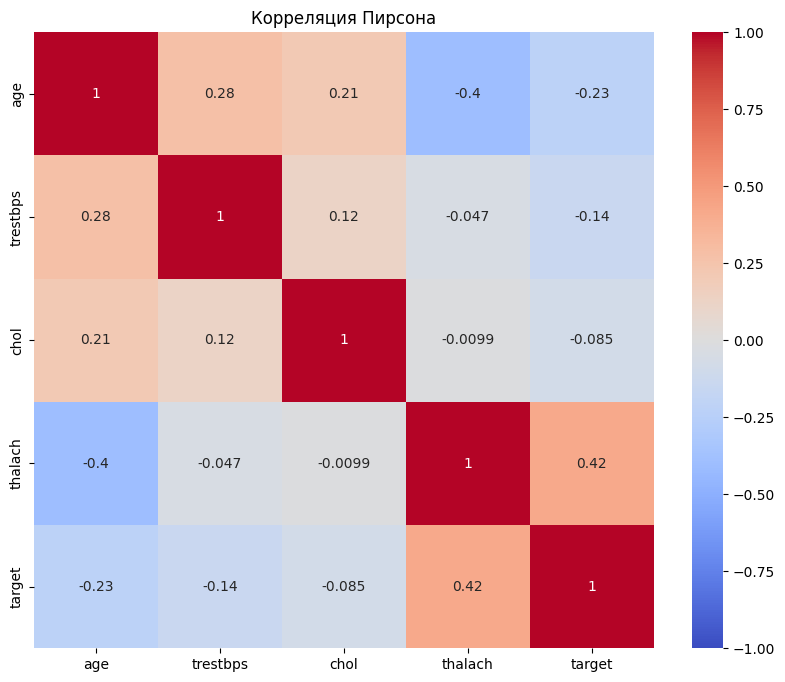

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Пирсона')
plt.show()

Корреляция Спирмена

Формула:  
$
\rho = 1 - \frac{6 \times \sum d_{i}^2}{n(n^2 - 1)}
$  
где $d_i$ — разность между рангами каждой переменной, $n$ — количество наблюдений.  
Спирмен не предполагает линейности связи, он оценивает только монотонные зависимости (например, логарифмическую, экспоненциальную или степенную).  

Подсчет рангов:  
1. Сортировка:
Сначала значения переменной сортируются по возрастанию (или убыванию).

2. Присвоение рангов:
Наименьшему значению присваивается ранг 1, следующему за ним — ранг 2, и так далее.

3. Одинаковые значения (связанные ранги):
Если в наборе данных встречаются одинаковые значения (связанные ранги), им присваивается средний ранг, соответствующий их позиции. Например, если два значения занимают 3-е и 4-е места в отсортированном списке, они получат средний ранг (3 + 4)/2 = 3.5

In [33]:
correlation_matrix = pd.DataFrame(index=quant_columns, columns=quant_columns)

for var1 in quant_columns:
    for var2 in quant_columns:
        if var1 != var2:
            corr, p_value = spearmanr(data[var1], data[var2])
            correlation_matrix.loc[var1, var2] = 'значима' if p_value < ALPHA else 'не значима'

spearman_corr = data[quant_columns].corr(method='spearman')
spearman_corr

,age,trestbps,chol,thalach,target
age,1.000000,0.285617,0.195786,-0.398052,-0.238400
trestbps,0.285617,1.000000,0.126562,-0.040407,-0.121593
chol,0.195786,0.126562,1.000000,-0.046766,-0.120888
thalach,-0.398052,-0.040407,-0.046766,1.000000,0.428370
target,-0.238400,-0.121593,-0.120888,0.428370,1.000000


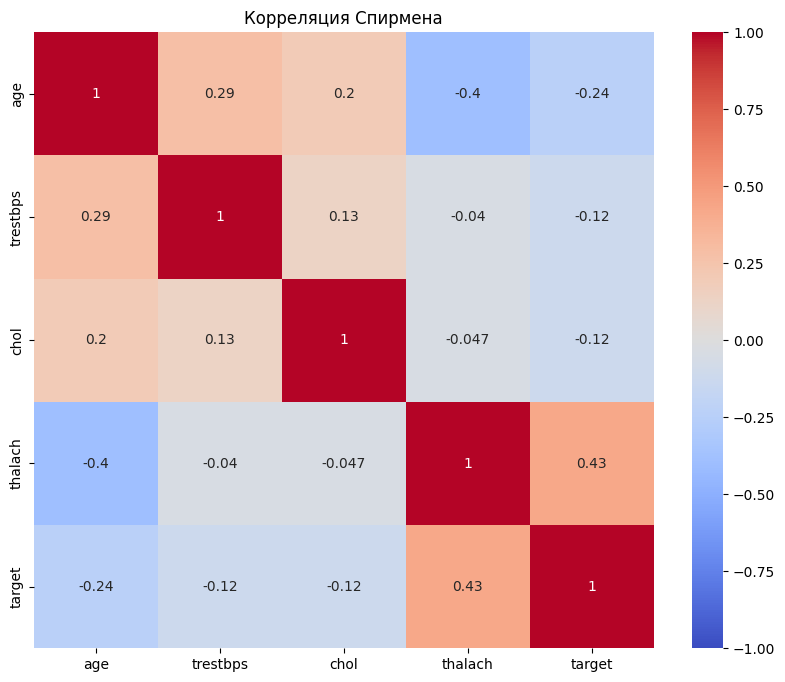

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляция Спирмена')
plt.show()

#### Категориальные данные

In [35]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'target']

Коэффициент Крамера V для категориальных переменных

In [36]:
def cramers_v_with_significance(confusion_matrix):
    chi2, p_value, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
    return cramers_v, p_value

cramers_v_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)
cramers_p_value_matrix = pd.DataFrame(index=cat_columns, columns=cat_columns)

for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(data[col1], data[col2])
            v, p = cramers_v_with_significance(contingency_table)
            
            cramers_v_matrix.loc[col1, col2] = v
            cramers_p_value_matrix.loc[col1, col2] = f'значима' if p < ALPHA else f'не значима'
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

cramers_v_matrix = cramers_v_matrix.astype(float)

cramers_v_matrix


,sex,cp,fbs,restecg,exang,target
sex,NaN,0.150050,0.035058,0.110464,0.134101,0.273814
cp,0.150050,NaN,0.113242,0.126437,0.471457,0.519223
fbs,0.035058,0.113242,NaN,0.087068,0.015771,0.018728
restecg,0.110464,0.126437,0.087068,NaN,0.099106,0.181878
exang,0.134101,0.471457,0.015771,0.099106,NaN,0.429692
target,0.273814,0.519223,0.018728,0.181878,0.429692,NaN


### Результаты анализа

Категориальные аттрибуты

In [37]:
cramers_p_value_matrix

,sex,cp,fbs,restecg,exang,target
sex,NaN,не значима,не значима,не значима,значима,значима
cp,не значима,NaN,не значима,не значима,значима,значима
fbs,не значима,не значима,NaN,не значима,не значима,не значима
restecg,не значима,не значима,не значима,NaN,не значима,значима
exang,значима,значима,не значима,не значима,NaN,значима
target,значима,значима,не значима,значима,значима,NaN


Числовые аттрибуты

In [38]:
correlation_matrix

,age,trestbps,chol,thalach,target
age,NaN,значима,значима,значима,значима
trestbps,значима,NaN,значима,не значима,значима
chol,значима,значима,NaN,не значима,значима
thalach,значима,не значима,не значима,NaN,значима
target,значима,значима,значима,значима,NaN


**Выводы о значимых корреляциях:**

1. Возраст (age) и артериальное давление в покое (trestbps)  
   Корреляция: 0.286  
   Вывод: Существует слабая положительная связь между возрастом и артериальным давлением в покое. Это указывает на то, что с увеличением возраста артериальное давление в покое имеет тенденцию к повышению.

2. Возраст (age) и уровень холестерина (chol)  
   Корреляция: 0.196  
   Вывод: Существует слабая положительная связь между возрастом и уровнем холестерина, что свидетельствует о небольшой тенденции к росту уровня холестерина с возрастом.

3. Возраст (age) и максимальная частота сердцебиения (thalach)  
   Корреляция: -0.398  
   Вывод: С увеличением возраста максимальная частота сердцебиения имеет тенденцию к снижению, что подтверждается умеренно отрицательной корреляцией. Это может свидетельствовать о естественном снижении способности сердца к высокой нагрузке с возрастом.

4. Возраст (age) и целевая переменная (target)  
   Корреляция: -0.238  
   Вывод: Между возрастом и целевой переменной (например, наличие сердечно-сосудистых заболеваний) существует умеренная отрицательная корреляция, что может указывать на более низкие значения целевой переменной при увеличении возраста.

5. Артериальное давление в покое (trestbps) и уровень холестерина (chol)  
   Корреляция: 0.127  
   Вывод: Между артериальным давлением в покое и уровнем холестерина существует слабая положительная корреляция. Это может указывать на небольшую тенденцию к увеличению уровня холестерина при повышении артериального давления.

6. Артериальное давление в покое (trestbps) и целевая переменная (target)  
   Корреляция: -0.122  
   Вывод: Слабая отрицательная корреляция между артериальным давлением в покое и целевой переменной может указывать на то, что более высокие значения артериального давления связаны с более низкими значениями целевой переменной.

7. Уровень холестерина (chol) и целевая переменная (target)  
   Корреляция: -0.121  
   Вывод: Слабая отрицательная корреляция между уровнем холестерина и целевой переменной также свидетельствует о том, что более высокие значения холестерина могут быть связаны с более низкими значениями целевой переменной.

8. Максимальная частота сердцебиения (thalach) и целевая переменная (target)  
   Корреляция: 0.428  
   Вывод: Существует умеренная положительная связь между максимальной частотой сердцебиения и целевой переменной, что может указывать на тенденцию к увеличению частоты сердцебиения с повышением значений целевой переменной.

9. Пол (sex) и максимальная частота сердцебиения (thalach)  
   Корреляция: 0.134  
   Вывод: Существует слабая положительная связь между полом и максимальной частотой сердцебиения.

10. Пол (sex) и целевая переменная (target)  
    Корреляция: 0.274  
    Вывод: Существует умеренная положительная связь между полом и целевой переменной, что может указывать на то, что пол может влиять на риск сердечно-сосудистых заболеваний.

11. Тип боли в груди (cp) и максимальная частота сердцебиения (thalach)  
    Корреляция: 0.471  
    Вывод: Существует сильная положительная связь между типом боли в груди и максимальной частотой сердцебиения, что может указывать на то, что разные типы боли могут по-разному влиять на физическую активность.

12. Тип боли в груди (cp) и целевая переменная (target)  
    Корреляция: 0.519  
    Вывод: Сильная положительная связь между типом боли в груди и целевой переменной говорит о том, что тип боли в груди является важным предиктором наличия сердечно-сосудистых заболеваний.

13. Электрокардиограмма в покое (restecg) и целевая переменная (target)  
    Корреляция: 0.182  
    Вывод: Слабая положительная связь между результатами электрокардиограммы и целевой переменной может указывать на то, что результаты теста могут иметь некоторое влияние на риск сердечно-сосудистых заболеваний.

14. Физическая нагрузка (exang) и целевая переменная (target)  
    Корреляция: 0.430  
    Вывод: Умеренная положительная связь между физической нагрузкой и целевой переменной может указывать на то, что пациенты с более высокой физической нагрузкой могут иметь больший риск сердечно-сосудистых заболеваний.


#### Зависимость и корреляция переменных

* Корреляция описывает степень, с которой две переменные изменяются вместе. В вашем случае корреляция Спирмена измеряет ранговую зависимость между переменными.
* Зависимость более широкое понятие, которое может включать как линейные, так и нелинейные взаимосвязи. Например, даже если корреляция между двумя переменными низкая или равна нулю, это не обязательно означает, что они независимы.

In [39]:
spearman_corr

,age,trestbps,chol,thalach,target
age,1.000000,0.285617,0.195786,-0.398052,-0.238400
trestbps,0.285617,1.000000,0.126562,-0.040407,-0.121593
chol,0.195786,0.126562,1.000000,-0.046766,-0.120888
thalach,-0.398052,-0.040407,-0.046766,1.000000,0.428370
target,-0.238400,-0.121593,-0.120888,0.428370,1.000000


* Некоррелированность: Если коэффициент корреляции равен нулю (или близок к нулю), это указывает на отсутствие линейной зависимости. Однако это не исключает возможность существования нелинейной зависимости. Например, если переменные имеют форму U или другой сложной зависимости, корреляция может быть нулевой, но переменные могут быть зависимыми.

* Независимость: Это более сильное утверждение, чем некоррелированность. Если переменные независимы, это означает, что изменение одной переменной не влияет на другую ни линейно, ни нелинейно.

Для таблицы корреляции Спирмена можно сделать вывод, что между некоторыми переменными есть зависимости, однако, некоррелированность не всегда подразумевает независимость.

# Оценка ложной корреляции между параметрами

Ложная корреляция (или искусственная корреляция) возникает, когда две переменные кажутся связанными, но на самом деле эта связь обусловлена другими факторами или случайностью.

## Загрузка датасета

Датасет взят с [источника](http://www.tylervigen.com/spurious/correlation/3268_popularity-of-the-first-name-stevie_correlates-with_netflixs-stock-price) с ложно корреляцией  
Описание датасета:  
Успокаивающее звучание имени Стиви привело к снижению уровня стресса в масштабах всей страны, что привело к увеличению числа людей, отдыхающих с Netflix, и, следовательно, к росту цены акций. Кроме того, ходят слухи, что Стиви Уандер на стороне пишет оригинальные сериалы для Netflix, и они всем нравятся.  

In [40]:
steve_data = pd.DataFrame({
    'StevePop': np.array([232,215,211,252,229,217,240,210,227,254,260,318,312,379,444,473,629,801,1147,1217,]),
    'NetflixPrice': np.array([0.85,4.11,1.8,3.87,3.71,3.79,4.22,7.93,25,10.04,13.6,52.4,49.15,109,124.96,196.1,259.28,326.1,539,605.61,])
})
steve_data.head()

,StevePop,NetflixPrice
0,232,0.85
1,215,4.11
2,211,1.80
3,252,3.87
4,229,3.71


## Оценка корреляции

### Посчитаем корреляцию

In [41]:
steve_data.corr()

,StevePop,NetflixPrice
StevePop,1.00000,0.99635
NetflixPrice,0.99635,1.00000


### Построим графики зависимостей и построим линии тренда

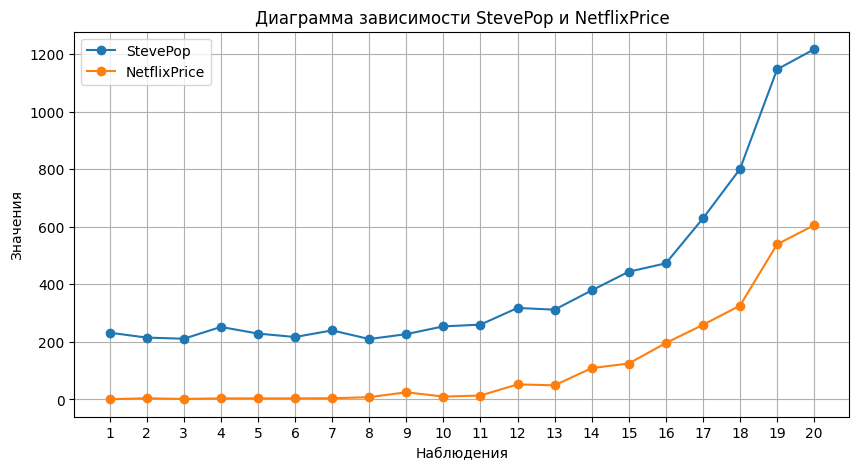

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(steve_data.index + 1, steve_data['StevePop'], label='StevePop', marker='o')
plt.plot(steve_data.index + 1, steve_data['NetflixPrice'], label='NetflixPrice', marker='o')

plt.title('Диаграмма зависимости StevePop и NetflixPrice')
plt.xlabel('Наблюдения')
plt.ylabel('Значения')
plt.xticks(steve_data.index + 1)
plt.legend()
plt.grid()
plt.show()


Для добавлении линии тренда можно использовать линейную регрессию, так как она в случае зависимости "переменная - целевая переменная" будет описывать тренд

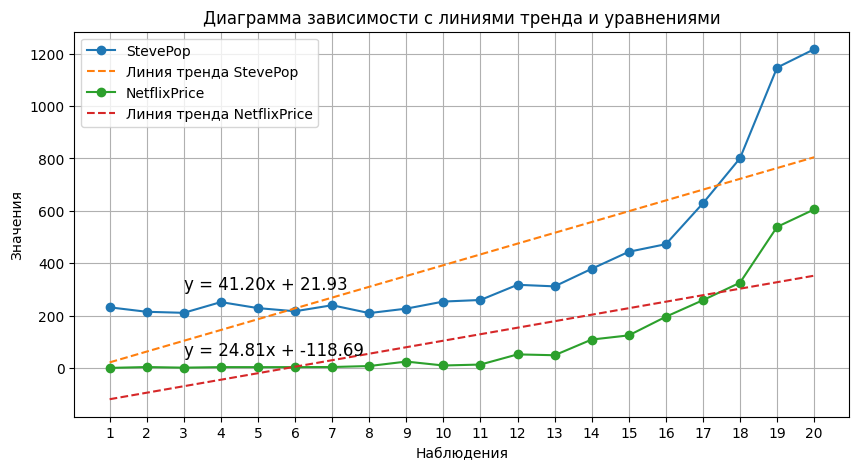

In [43]:
from sklearn.linear_model import LinearRegression

X = np.array(steve_data.index).reshape(-1, 1)  # Преобразуем индекс в 2D массив
y_steve = steve_data['StevePop']
y_netflix = steve_data['NetflixPrice']

model_steve = LinearRegression().fit(X, y_steve)
steve_data['StevePopTrend'] = model_steve.predict(X)

model_netflix = LinearRegression().fit(X, y_netflix)
steve_data['NetflixPriceTrend'] = model_netflix.predict(X)

equation_steve = f'y = {model_steve.coef_[0]:.2f}x + {model_steve.intercept_:.2f}'
equation_netflix = f'y = {model_netflix.coef_[0]:.2f}x + {model_netflix.intercept_:.2f}'

plt.figure(figsize=(10, 5))
plt.plot(steve_data.index + 1, steve_data['StevePop'], label='StevePop', marker='o')
plt.plot(steve_data.index + 1, steve_data['StevePopTrend'], label='Линия тренда StevePop', linestyle='--')

plt.plot(steve_data.index + 1, steve_data['NetflixPrice'], label='NetflixPrice', marker='o')
plt.plot(steve_data.index + 1, steve_data['NetflixPriceTrend'], label='Линия тренда NetflixPrice', linestyle='--')

plt.title('Диаграмма зависимости с линиями тренда и уравнениями')
plt.xlabel('Наблюдения')
plt.ylabel('Значения')
plt.xticks(steve_data.index + 1)
plt.legend()
plt.text(3, 300, equation_steve, fontsize=12)
plt.text(3, 50, equation_netflix, fontsize=12)
plt.grid()
plt.show()


Однако мы будем использовать нелинейную модель для тренда и дальнейших подсчетов, возьмем полином 10-ой степени

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(np.array(steve_data.index).reshape(-1, 1))

model_steve_poly = LinearRegression().fit(X_poly, steve_data['StevePop'])
steve_data['StevePopPredicted'] = model_steve_poly.predict(X_poly)

model_netflix_poly = LinearRegression().fit(X_poly, steve_data['NetflixPrice'])
steve_data['NetflixPricePredicted'] = model_netflix_poly.predict(X_poly)

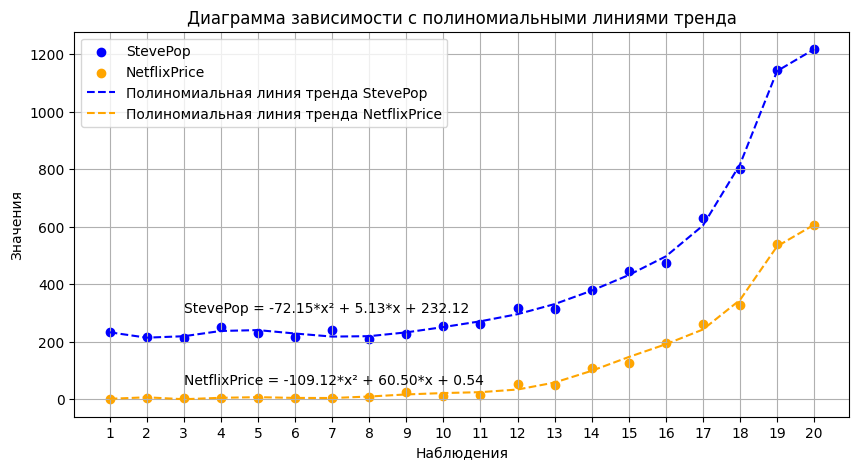

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(steve_data.index + 1, steve_data['StevePop'], label='StevePop', color='blue', marker='o')
plt.scatter(steve_data.index + 1, steve_data['NetflixPrice'], label='NetflixPrice', color='orange', marker='o')

plt.plot(steve_data.index + 1, steve_data['StevePopPredicted'], label='Полиномиальная линия тренда StevePop', linestyle='--', color='blue')
plt.plot(steve_data.index + 1, steve_data['NetflixPricePredicted'], label='Полиномиальная линия тренда NetflixPrice', linestyle='--', color='orange')

coeffs_steve = model_steve_poly.coef_
coeffs_netflix = model_netflix_poly.coef_

equation_steve = f'StevePop = {coeffs_steve[2]:.2f}*x² + {coeffs_steve[1]:.2f}*x + {model_steve_poly.intercept_:.2f}'
equation_netflix = f'NetflixPrice = {coeffs_netflix[2]:.2f}*x² + {coeffs_netflix[1]:.2f}*x + {model_netflix_poly.intercept_:.2f}'

plt.text(3, 300, equation_steve, fontsize=10)
plt.text(3, 50, equation_netflix, fontsize=10)

plt.title('Диаграмма зависимости с полиномиальными линиями тренда')
plt.xlabel('Наблюдения')
plt.ylabel('Значения')
plt.xticks(steve_data.index + 1)
plt.legend()
plt.grid()
plt.show()

### Найдем корреляцию остатков

Подсчитаем остатки и стандартизируем их

In [47]:
steve_data['StevePopResiduals'] = steve_data['StevePop'] - steve_data['StevePopPredicted']
steve_data['NetflixPriceResiduals'] = steve_data['NetflixPrice'] - steve_data['NetflixPricePredicted']

steve_data['StevePopStandardizedResiduals'] = (steve_data['StevePopResiduals'] - steve_data['StevePopResiduals'].mean()) / steve_data['StevePopResiduals'].std()
steve_data['NetflixPriceStandardizedResiduals'] = (steve_data['NetflixPriceResiduals'] - steve_data['NetflixPriceResiduals'].mean()) / steve_data['NetflixPriceResiduals'].std()

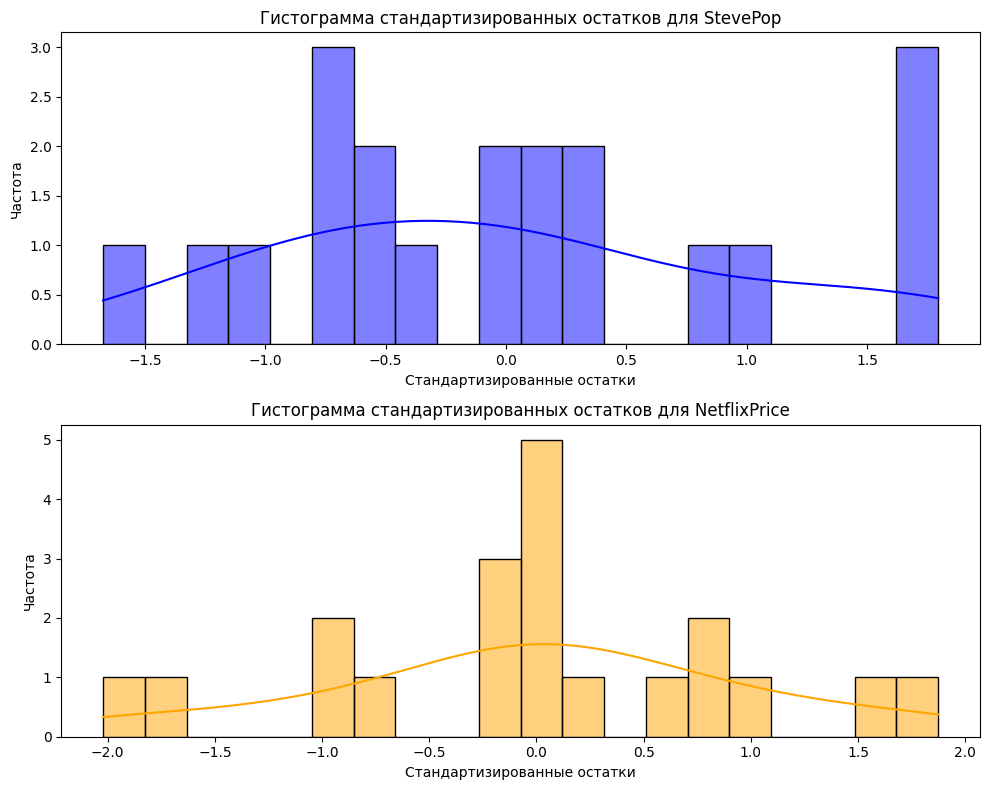

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(steve_data['StevePopStandardizedResiduals'], bins=20, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Гистограмма стандартизированных остатков для StevePop')
axs[0].set_xlabel('Стандартизированные остатки')
axs[0].set_ylabel('Частота')

sns.histplot(steve_data['NetflixPriceStandardizedResiduals'], bins=20, kde=True, ax=axs[1], color='orange')
axs[1].set_title('Гистограмма стандартизированных остатков для NetflixPrice')
axs[1].set_xlabel('Стандартизированные остатки')
axs[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Найдем их корреляцию

In [49]:
correlation = round(steve_data['StevePopResiduals'].corr(steve_data['NetflixPriceResiduals']),4)
correlation

0.373

# Регрессионный анализ

## Выводы из корреляционного анализа

In [50]:
def print_important(matrix, coef_matrix):
    for i, col1 in enumerate(matrix.columns):
        for j, col2 in enumerate(matrix.index):
            if i < j and matrix.loc[col1, col2] == 'значима':
                print(f'Значимая связь между {col1} и {col2}:\t {coef_matrix.loc[col1,col2]:.3f}')

In [51]:
print_important(correlation_matrix, spearman_corr)

Значимая связь между age и trestbps:	 0.286
Значимая связь между age и chol:	 0.196
Значимая связь между age и thalach:	 -0.398
Значимая связь между age и target:	 -0.238
Значимая связь между trestbps и chol:	 0.127
Значимая связь между trestbps и target:	 -0.122
Значимая связь между chol и target:	 -0.121
Значимая связь между thalach и target:	 0.428


In [52]:
print_important(cramers_p_value_matrix, cramers_v_matrix)

Значимая связь между sex и exang:	 0.134
Значимая связь между sex и target:	 0.274
Значимая связь между cp и exang:	 0.471
Значимая связь между cp и target:	 0.519
Значимая связь между restecg и target:	 0.182
Значимая связь между exang и target:	 0.430


### Диаграммы рассеивания

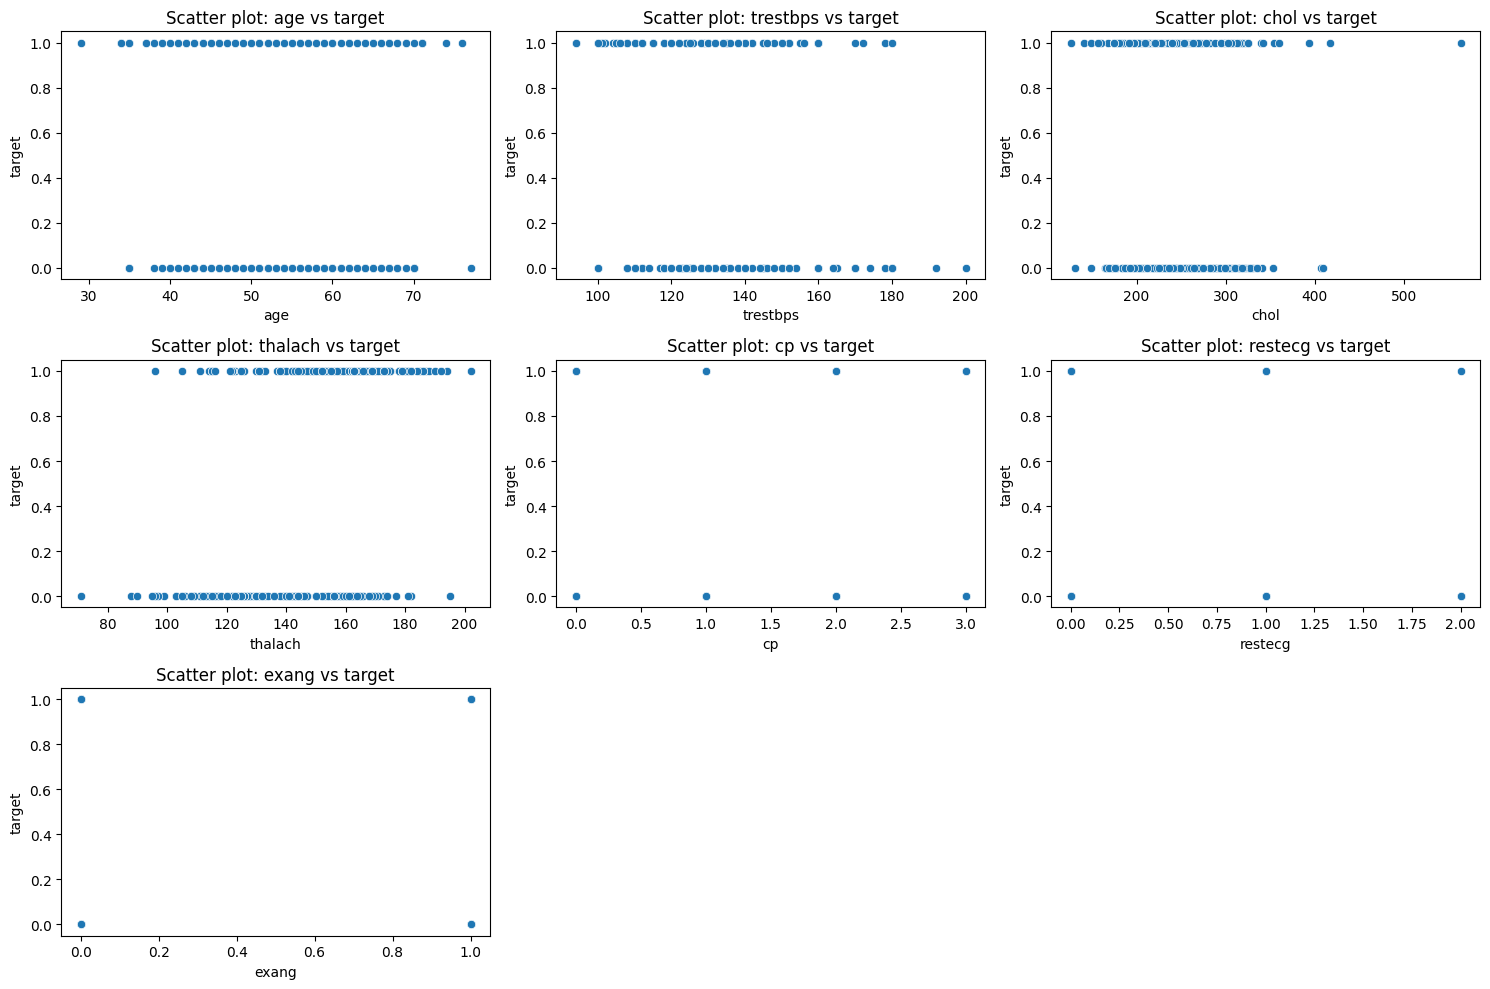

In [70]:
variables = ['age', 'trestbps', 'chol', 'thalach', 'cp', 'restecg', 'exang']

plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[var], y=data['target'])
    plt.title(f'Scatter plot: {var} vs target')
    plt.xlabel(var)
    plt.ylabel('target')

plt.tight_layout()
plt.show()

## Построение регрессионной модели

Напишем функцию, которая будет делать регрессионный анализ

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_linear_regression(X, y):
    """
    Функция для оценки линейной регрессионной модели.
    
    Параметры:
    X (DataFrame): Признаки для модели.
    y (Series): Целевая переменная.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    coefficients = model.coef_
    intercept = model.intercept_

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Среднеквадратичная ошибка: {mse:.3f}')
    print(f'Коэффициент детерминации (R^2): {r2:.3f}')

    # Вывод графика остатков
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.axvline(0, color='red', linestyle='--')
    plt.title('График остатков')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.show()

    # Построение гистограммы стандартизированных остатков
    standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
    plt.figure(figsize=(10, 6))
    sns.histplot(standardized_residuals, bins=30, kde=True)
    plt.title('Гистограмма стандартизированных остатков')
    plt.xlabel('Стандартизированные остатки')
    plt.ylabel('Частота')
    plt.show()

    print(f'Уравнение регрессии: target = \n{intercept:.2f} + \n{" + \n".join([f"{coef:.5f} * {name}" for coef, name in zip(coefficients, X.columns)])}')


### Три самых высококоррелированных признака:

Среднеквадратичная ошибка: 0.150
Коэффициент детерминации (R^2): 0.397


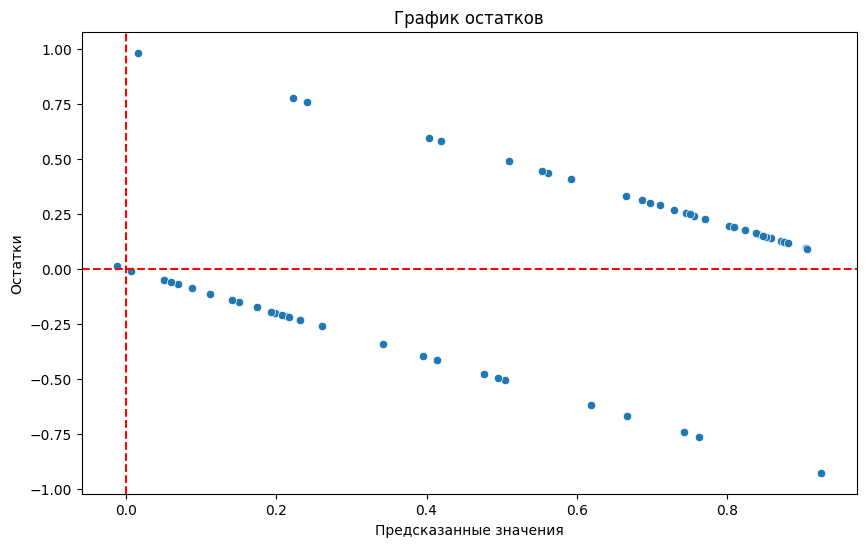

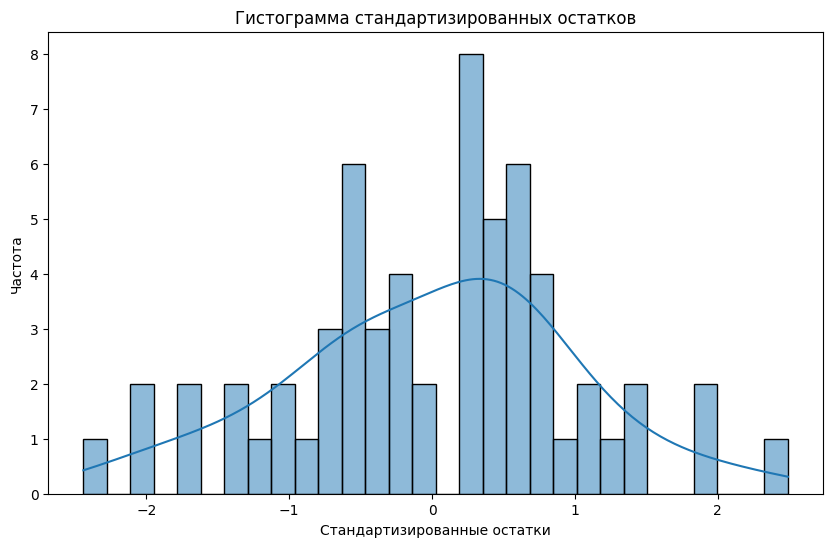

Уравнение регрессии: target = 
-0.20 + 
-0.28744 * exang + 
0.12123 * cp + 
0.00478 * thalach


In [69]:
evaluate_linear_regression(data[ ['exang', 'cp', 'thalach']], data['target'])

### Пять самых востребованных признаков

Среднеквадратичная ошибка: 0.145
Коэффициент детерминации (R^2): 0.418


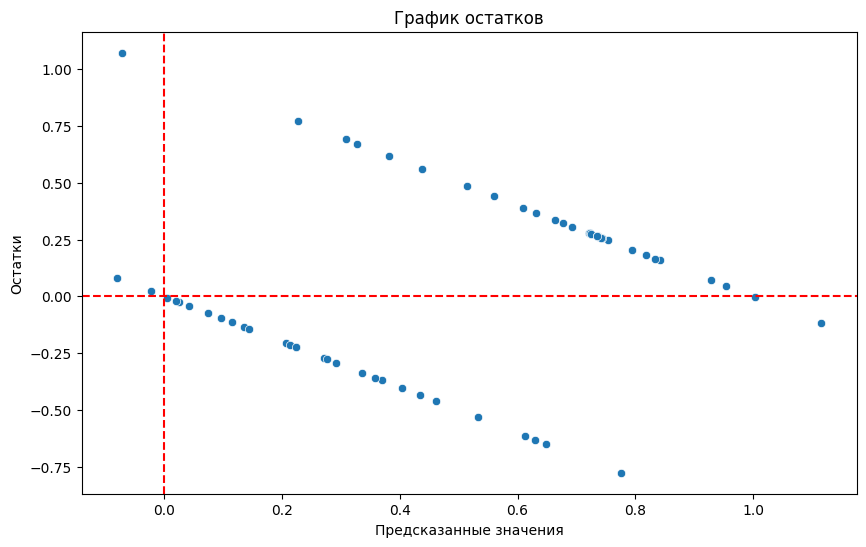

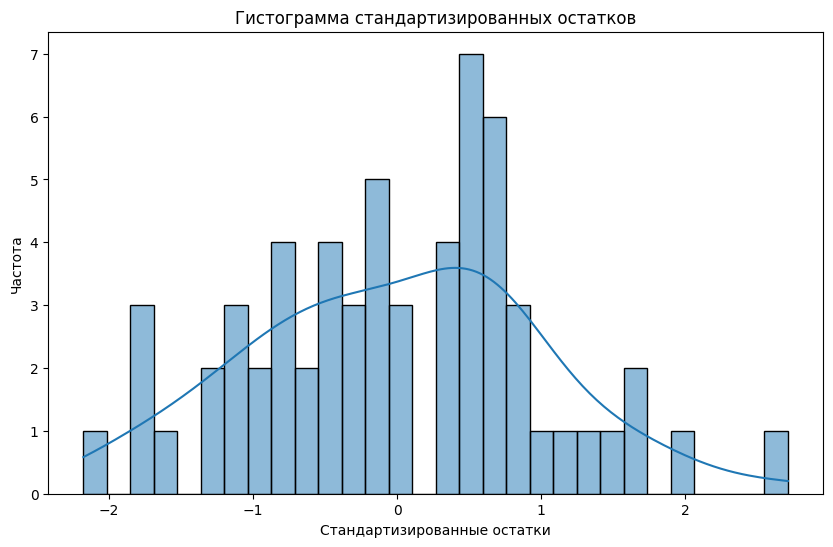

Уравнение регрессии: target = 
0.52 + 
-0.24175 * exang + 
0.12215 * cp + 
0.00377 * thalach + 
-0.27836 * sex + 
-0.00725 * age


In [57]:
evaluate_linear_regression(data[ ['exang', 'cp', 'thalach', 'sex', 'age']], data['target'])

### Абсолютно все признаки

Среднеквадратичная ошибка: 0.132
Коэффициент детерминации (R^2): 0.469


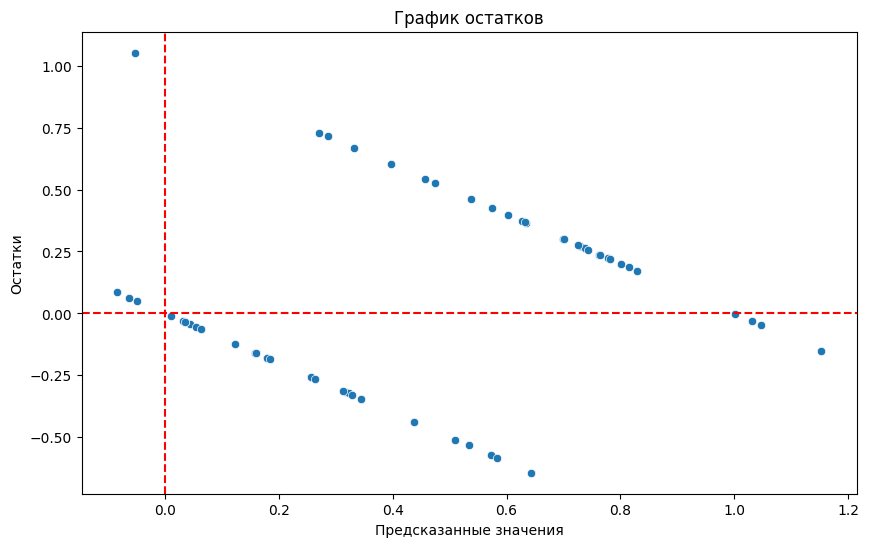

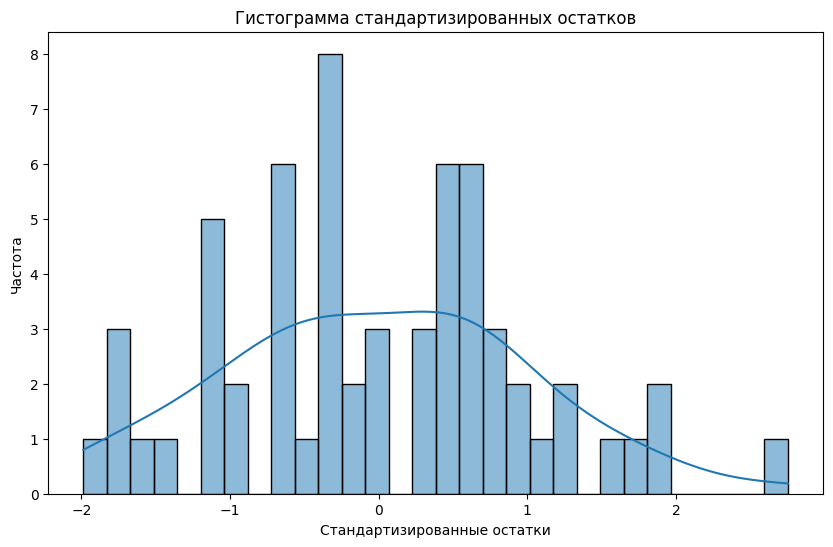

Уравнение регрессии: target = 
0.75 + 
-0.00485 * age + 
-0.29267 * sex + 
0.12201 * cp + 
-0.00246 * trestbps + 
-0.00050 * chol + 
0.00807 * fbs + 
0.03507 * restecg + 
0.00418 * thalach + 
-0.23061 * exang


In [58]:
evaluate_linear_regression(data.drop(columns=['target']), data['target'])

### Значимости получившихся моделей

Давай обсудим значимость получившихся линейных регрессионных моделей на основе представленных метрик: среднеквадратичная ошибка (MSE) и коэффициент детерминации (R²).

#### Модель 1:
- Уравнение регрессии:  
  $
  \text{target} = -0.20 - 0.28744 \cdot \text{exang} + 0.12123 \cdot \text{cp} + 0.00478 \cdot \text{thalach}
  $  
- Среднеквадратичная ошибка (MSE): 0.150
- Коэффициент детерминации (R²): 0.397

Вывод:
- MSE: Значение 0.150 говорит о том, что в среднем предсказанные значения отклоняются от фактических на 0.150. Это относительно приемлемое значение, но существует потенциал для улучшения.
- R²: Значение 0.397 означает, что примерно 39.7% вариации целевой переменной (target) объясняется данной моделью. Это указывает на то, что модель имеет умеренную объяснительную силу, но значительная доля вариации остается необъясненной.

#### Модель 2:
- Уравнение регрессии:  
   $
  \text{target} = 0.52 - 0.24175 \cdot \text{exang} + 0.12215 \cdot \text{cp} + 0.00377 \cdot \text{thalach} - 0.27836 \cdot \text{sex} - 0.00725 \cdot \text{age}
   $  
- Среднеквадратичная ошибка (MSE): 0.145
- Коэффициент детерминации (R²): 0.418

Вывод:
- MSE: Снижение MSE до 0.145 указывает на улучшение точности предсказаний по сравнению с первой моделью.
- R²: Значение 0.418 означает, что 41.8% вариации объясняется моделью, что немного лучше, чем в первой модели. Это может быть признаком того, что добавление новых признаков улучшает предсказательную способность модели.

#### Модель 3:
- Уравнение регрессии:  
   $
  \text{target} = 0.75 - 0.00485 \cdot \text{age} - 0.29267 \cdot \text{sex} + 0.12201 \cdot \text{cp} - 0.00246 \cdot \text{trestbps} - 0.00050 \cdot \text{chol} + 0.00807 \cdot \text{fbs} + 0.03507 \cdot \text{restecg} + 0.00418 \cdot \text{thalach} - 0.23061 \cdot \text{exang}
   $  
- Среднеквадратичная ошибка (MSE): 0.132
- Коэффициент детерминации (R²): 0.469

Вывод:
- MSE: Значение 0.132 показывает дальнейшее улучшение в точности предсказания по сравнению с предыдущими моделями.
- R²: Значение 0.469 говорит о том, что 46.9% вариации целевой переменной объясняется моделью. Это уже довольно значительное значение, которое указывает на хорошую предсказательную силу модели.

#### Общие выводы:
1. Снижение MSE: По мере добавления новых признаков, среднеквадратичная ошибка уменьшается, что указывает на улучшение точности модели.
2. Увеличение R²: Каждая последующая модель объясняет большую долю вариации целевой переменной, что свидетельствует о том, что добавление новых переменных помогает улучшить понимание зависимости целевой переменной от других факторов.
3. Значимость переменных: В уравнениях регрессии можно видеть, какие переменные оказывают наибольшее влияние на целевую переменную. Например, переменная exang имеет отрицательный коэффициент в обеих моделях, что может указывать на ее значимость в контексте целевой переменной.

# Дисперсионный анализ

## Сформулируем H0 гипотезу об 1 параметре 

In [327]:
print_important(cramers_p_value_matrix, cramers_v_matrix)
print_important(correlation_matrix, spearman_corr)

Значимая связь между sex и exang:	 0.134
Значимая связь между sex и target:	 0.274
Значимая связь между cp и exang:	 0.471
Значимая связь между cp и target:	 0.519
Значимая связь между restecg и target:	 0.182
Значимая связь между exang и target:	 0.430
Значимая связь между age и trestbps:	 0.286
Значимая связь между age и chol:	 0.196
Значимая связь между age и thalach:	 -0.398
Значимая связь между age и target:	 -0.238
Значимая связь между trestbps и chol:	 0.127
Значимая связь между trestbps и target:	 -0.122
Значимая связь между chol и target:	 -0.121
Значимая связь между thalach и target:	 0.428


Максимальное значение корреляции наблюдается между переменными cp и target, равное 0.519.  
Это указывает на то, что существует сильная положительная связь между типом боли в груди (cp) и наличием сердечно-сосудистых заболеваний (target).

**Начальная гипотеза (H0)**: Существует значимая связь между типом боли в груди (cp) и наличием сердечно-сосудистых заболеваний (target).  
  
**Альтернативная гипотеза (H1)**: Отсутствует значимая связь между типом боли в груди (cp) и наличием сердечно-сосудистых заболеваний (target).  

## Градации параметра

Поскольку тип боли в груди является категориальной переменной, мы можем разбить зависимую переменную (наличие сердечно-сосудистых заболеваний) на две категории:

* 0: Отсутствие заболевания
* 1: Наличие заболевания

## Однофакторный дисперсионный анализ

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X = data[['cp']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

print("Процент правильных предиктов:", round(accuracy_score(y_test, y_pred),3))
print("\nМатрица путаницы:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Процент правильных предиктов: 0.836

Матрица путаницы:
 [[26  3]
 [ 7 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Выводы по анализу

1. Precision (точность):  
Определяет долю истинно положительных результатов (TP) среди всех предсказанных положительных результатов (TP + FP).
Высокая точность означает, что модель делает немного ложных срабатываний.  
Для класса 0: 0.79 — это означает, что 79% предсказаний класса 0 были верными.  
Для класса 1: 0.89 — 89% предсказаний класса 1 были верными.  

2. Recall (полнота):  
Определяет долю истинно положительных результатов среди всех фактических положительных случаев (TP + FN).  
Высокая полнота указывает на то, что модель хорошо находит все положительные случаи.  
Для класса 0: 0.90 — 90% всех фактических положительных случаев класса 0 были правильно предсказаны.  
Для класса 1: 0.78 — 78% фактических случаев класса 1 были правильно предсказаны.  

3. F1-Score:  
Это средняя гармоническая точности и полноты. Это полезно, когда необходимо найти баланс между точностью и полнотой.  
F1-Score для класса 0: 0.84.  
F1-Score для класса 1: 0.83.  

4. Support:  
Количество фактических случаев для каждого класса в наборе данных.  
Для класса 0: 29.  
Для класса 1: 32.  

5. Accuracy (точность модели):  
Общая доля правильных предсказаний (истинно положительные и истинно отрицательные) среди общего числа предсказаний.  
В вашем случае точность модели составляет 0.84 (или 84%).  

6. Macro Average:  
Средние значения для всех классов (без учета их поддержки). В вашем случае все метрики составляют 0.84.  

7. Weighted Average:  
Средние значения для всех классов, взвешенные по количеству экземпляров каждого класса. Это также составляет 0.84.  

## Двухфакторный дисперсионный анализ

In [346]:
data_dummies = data[['sex', 'cp']]

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Матрица путаницы:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Матрица путаницы:
[[32  9]
 [ 9 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Выводы о гипотезах

**На основании проведенного анализа и полученных результатов можно сделать следующие выводы о выдвинутых гипотезах:**

1. Гипотеза о зависимости между независимыми переменными и целевой переменной:  
Проведенные однофакторный и двухфакторный анализы, а также построение моделей логистической регрессии подтвердили наличие значимых взаимосвязей между несколькими независимыми переменными (например, sex, cp, thalach, exang) и целевой переменной target.  
Результаты указывают на то, что изменения в этих факторах действительно влияют на вероятность достижения различных состояний (например, наличие или отсутствие сердечно-сосудистых заболеваний).
Таким образом, гипотеза о том, что независимые переменные имеют влияние на целевую переменную, подтверждается.  

2. Гипотеза о точности модели:  
Полученные метрики, такие как точность (accuracy), точность (precision), полнота (recall) и F1-score, показывают, что модели, построенные на основе логистической регрессии, дают достаточно высокие значения, указывающие на хорошую предсказательную способность.  
Поскольку точность модели составляет 80%, можно сказать, что гипотеза о том, что модель сможет адекватно предсказывать целевую переменную на основе независимых переменных, также подтверждается.  

3. Гипотеза о влиянии категориальных переменных:  
Результаты однофакторного и двухфакторного дисперсионного анализа также подтвердили, что такие категориальные переменные, как sex и cp, имеют значительное влияние на целевую переменную.
Это подтверждает гипотезу о том, что категориальные факторы могут существенно влиять на результаты и должны учитываться в моделях предсказания.  

4. Гипотеза о необходимости дальнейших исследований:  
Несмотря на то что гипотезы о влиянии переменных были подтверждены, результаты анализа также показали области, где можно улучшить модель. Например, количество ложных положительных и ложных отрицательных предсказаний может указывать на необходимость дополнительных исследований и настройки модели для достижения еще более высокой точности.  